# Script _ Lien nombre d'inflorescences et Lambda de Paul

Dans les vergers, les cécidomyies sont soit celles issues des générations précédentes du même verger qui émergent du sol, c'est la population endogène, soit elles viennent de l'extérieur, c'est la population exogène. 

Dans le modèle de Paul et le nôtre, nous posons $\lambda_t$ le nombre de cécidomyie entrant dans le verger à l'instant $t$.

Dans le modèle de Paul, ce $\lambda_t$ est estimé pour chaque date $t$.

Dans notre modèle, nous considérons un $\lambda_t$ constant au fil du temps que nous estimons. Ceci est très limitant surtout pour la parcelle bâchée où la population est seulement exogène. Nous ne voulons pas estimer un $\lambda_t$ à chaque date mais nous souhaitons avoir un $\lambda_t$ dépendant du nombre d'inflorescences dans le verger. 

L'objectif de ce script est de trouver une relation entre les $\lambda_t$ et les inflorescences à partir du modèle de Paul. 

## Récupération des données

In [1]:
load("Resultat_Vrais_AOCPlambda_2effpiege.RData")

In [2]:
# On recupere les 29 dates
date = sort(unique(infboittot.df$Date))


# On recupere le nombre d'inflorescences dans la parcelle a chaque date 

data = inflotot.df[inflotot.df$stade!='6',] # On enlève les ressources végétatives
data = split(data, data$Date)

Nb = length(data)
NbInflosPar  = c()
NbInflosPar1 = c()
NbInflosPar2 = c()
NbInflosPar3 = c()
NbInflosPar4 = c()
NbInflosPar5 = c()

# Pour chacune des 29 dates observées, on récupère le nombre d'inflorescences vivantes, 
# aux stades D, E, F, PF et G
ii = 1
for (i in 1:Nb) {
  tmp = data.frame(data[i])
  colnames(tmp) = colnames(infboittot.df)
  if (tmp$Date[i] %in% date) {
    NbInflosPar[ii]  = dim(tmp)[1]
    NbInflosPar1[ii] = dim(tmp[tmp$stade==1,])[1]
    NbInflosPar2[ii] = dim(tmp[tmp$stade==2,])[1]
    NbInflosPar3[ii] = dim(tmp[tmp$stade==3,])[1]
    NbInflosPar4[ii] = dim(tmp[tmp$stade==4,])[1]
    NbInflosPar5[ii] = dim(tmp[tmp$stade==5,])[1]
    ii = ii+1
  }
}

# On recupere les Lambdas
lambda0 = exp(Res_AOCPlambda_AMELIO5$estimate[1:29])
lambda0_sm = smooth(lambda0)

# On recupere les larves piegees 
larves = c()
databis = split(Larv.df$NbLarv,Larv.df$Date)
for (i in 1:length(databis)) {
    tmp = data.frame(databis[i])
    larves[i] = sum(tmp)
}

larves_sm = smooth(larves)

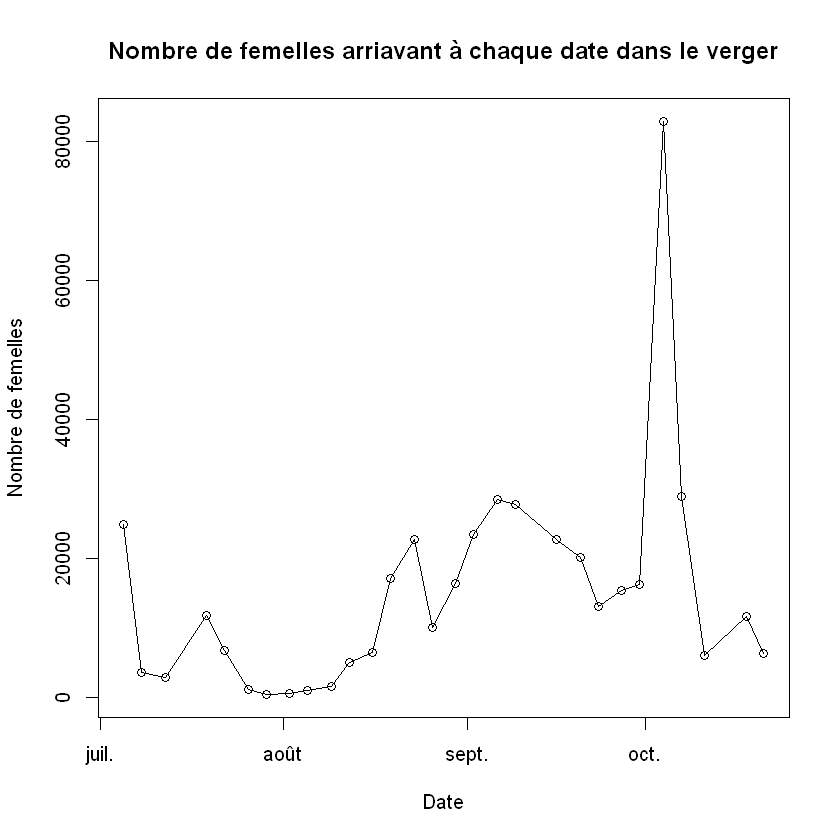

In [11]:
plot(as.Date(date),lambda0, type='o',ylab = "Nombre de femelles",xlab = "Date")
axis(1,at=1:29, lab=as.character(date))



## Liens larves _ lambda

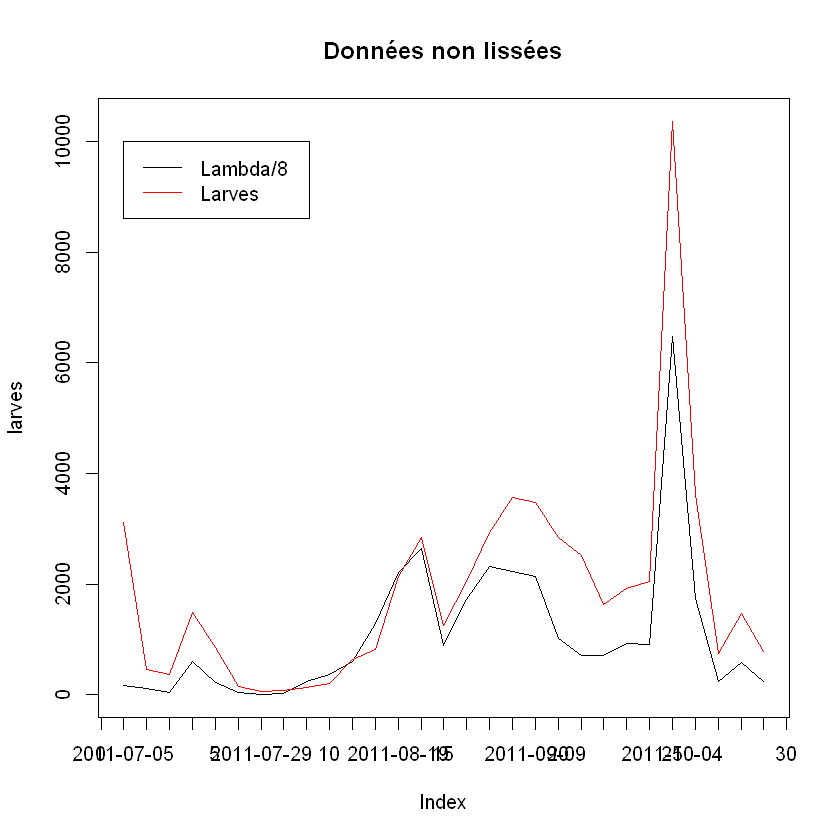

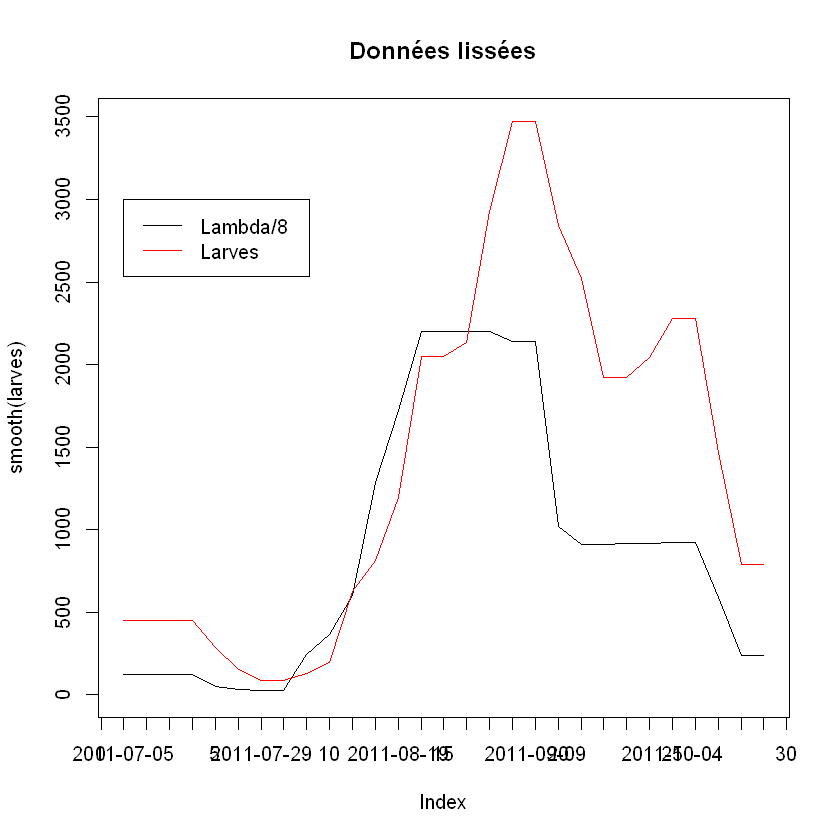

In [3]:
plot(larves,type='l',ylim=c(0,max(lambda0/8)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='l',col='red')
legend(1, 10000, legend=c("Lambda/8","Larves"),col=c("black","red"), lty=1)
title("Données non lissées")

plot(smooth(larves),type='l',ylim=c(0,max(smooth(lambda0)/8)))
axis(1,at=1:29, lab=as.character(date))
points(smooth(lambda0)/8,type='l',col='red')
legend(1, 3000, legend=c("Lambda/8","Larves"),col=c("black","red"), lty=1)
title("Données lissées")

### Décalage entre le nombre de lambda et le nombre de larves? 

In [4]:
cor_ = function (NbInflos) {
    y = c(cor(NbInflos,larves_sm),
        cor(c(0,NbInflos[1:28]),larves_sm),
        cor(c(0,0,NbInflos[1:27]),larves_sm),
        cor(c(0,0,0,NbInflos[1:26]),larves_sm),
        cor(c(0,0,0,0,NbInflos[1:25]),larves_sm),
        cor(c(0,0,0,0,0,NbInflos[1:24]),larves_sm),
        cor(c(0,0,0,0,0,0,NbInflos[1:23]),larves_sm),
        cor(c(0,0,0,0,0,0,0,NbInflos[1:22]),larves_sm),
        cor(c(0,0,0,0,0,0,0,0,NbInflos[1:21]),larves_sm),
        cor(c(0,0,0,0,0,0,0,0,0,NbInflos[1:20]),larves_sm),
        cor(c(0,0,0,0,0,0,0,0,0,0,NbInflos[1:19]),larves_sm),
        cor(c(0,0,0,0,0,0,0,0,0,0,0,NbInflos[1:18]),larves_sm),
        cor(c(0,0,0,0,0,0,0,0,0,0,0,0,NbInflos[1:17]),larves_sm))
    return (y)
}


# Tous stades confondus 
cor_tous = cor_(NbInflosPar)
best_tous = which.max(cor_tous)-1
print ("Tous stades : ")
print (best_tous)

# Stade D
cor_D = cor_(NbInflosPar1)
best_D = which.max(cor_D)-1
print ("Stade D : ")
print (best_D)

# Stade E
cor_E = cor_(NbInflosPar2)
best_E = which.max(cor_E)-1
print ("Stade E : ")
print (best_E)

# Stade F
cor_F = cor_(NbInflosPar3)
best_F = which.max(F)-1
print ("Stade F : ")
print (best_F)

# Stade PF
cor_PF = cor_(NbInflosPar4)
best_PF = which.max(cor_PF)-1
print ("Stade PF : ")
print (best_PF)

# Stade G
cor_G = cor_(NbInflosPar5)
best_G = which.max(cor_G)-1
print ("Stade G : ")
print (best_G)

[1] "Tous stades : "
[1] 0
[1] "Stade D : "
[1] 1
[1] "Stade E : "
[1] 1
[1] "Stade F : "
[1] 0
[1] "Stade PF : "
[1] 0
[1] "Stade G : "
[1] 10


In [5]:
## PAREIL MAIS AVEC LE PREMIER FLUSH UNIQUEMENT

# Tous stades confondus 
cor_1_tous = cor_(Total_1)
best_1_tous = which.max(cor_1_tous)-1
print ("Tous stades : ")
print (best_1_tous)

# Stade D
cor_1_D = cor_(NbInflosPar1_1)
best_1_D = which.max(cor_1_D)-1
print ("Stade D : ")
print (best_1_D)

# Stade E
cor_1_E = cor_(NbInflosPar2_1)
best_1_E = which.max(cor_1_E)-1
print ("Stade E : ")
print (best_1_E)

# Stade F
cor_1_F = cor_(NbInflosPar3_1)
best_1_F = which.max(cor_1_F)-1
print ("Stade F : ")
print (best_1_F)

# Stade PF
cor_1_PF = cor_(NbInflosPar4_1)
best_1_PF = which.max(cor_1_PF)-1
print ("Stade PF : ")
print (best_1_PF)

# Stade G
cor_1_G = cor_(NbInflosPar5_1)
best_1_G = which.max(cor_1_G)-1
print ("Stade G : ")
print (best_1_G)

ERROR: Error in is.data.frame(x): objet 'Total_1' introuvable


On a fait la corrélation entre les larves à la date t et les inflos à la date t-delta, on a différencier les stades et aussi le premier flush. Le meilleur delta est 0. Cela confirme la parfaite synchronicité entre les larves et les inflos. On ne capte pas la durée de développement des oeufs ...

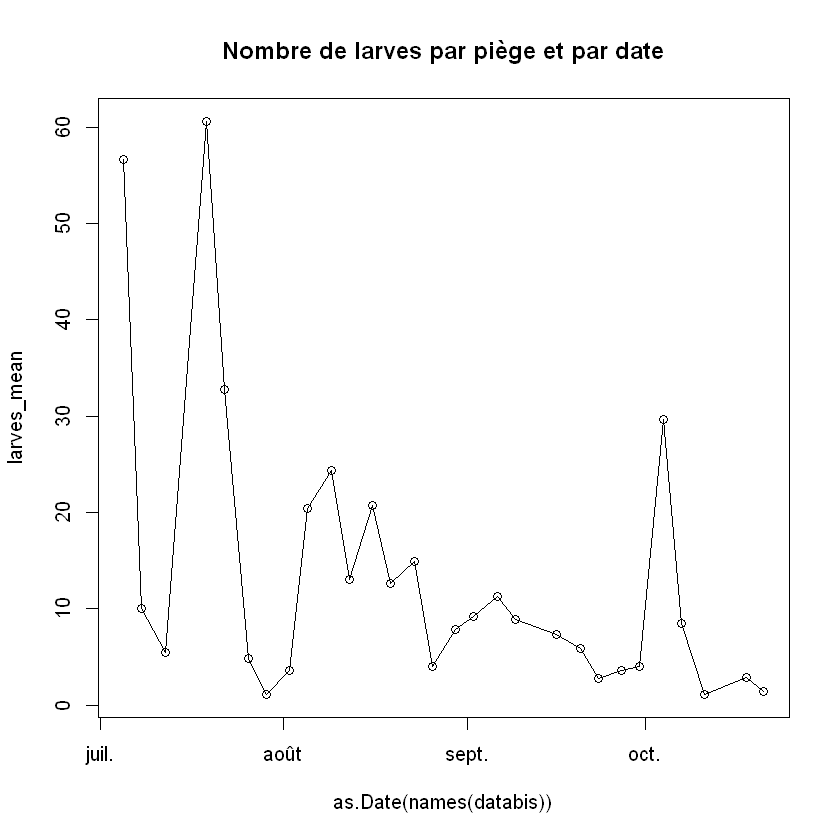

In [6]:
larves_mean = c()
nb_piege = c()
databis = split(Larv.df$NbLarv,Larv.df$Date)
for (i in 1:length(databis)) {
    tmp = data.frame(databis[i])
    larves_mean[i] = sum(tmp)/dim(tmp)[1]
    nb_piege[i] = dim(tmp)[1]
}

plot(as.Date(names(databis)),larves_mean, type='o')
axis(1,at=1:29,lab=as.character(date))
title("Nombre de larves par piège et par date")

## Premiers affichages

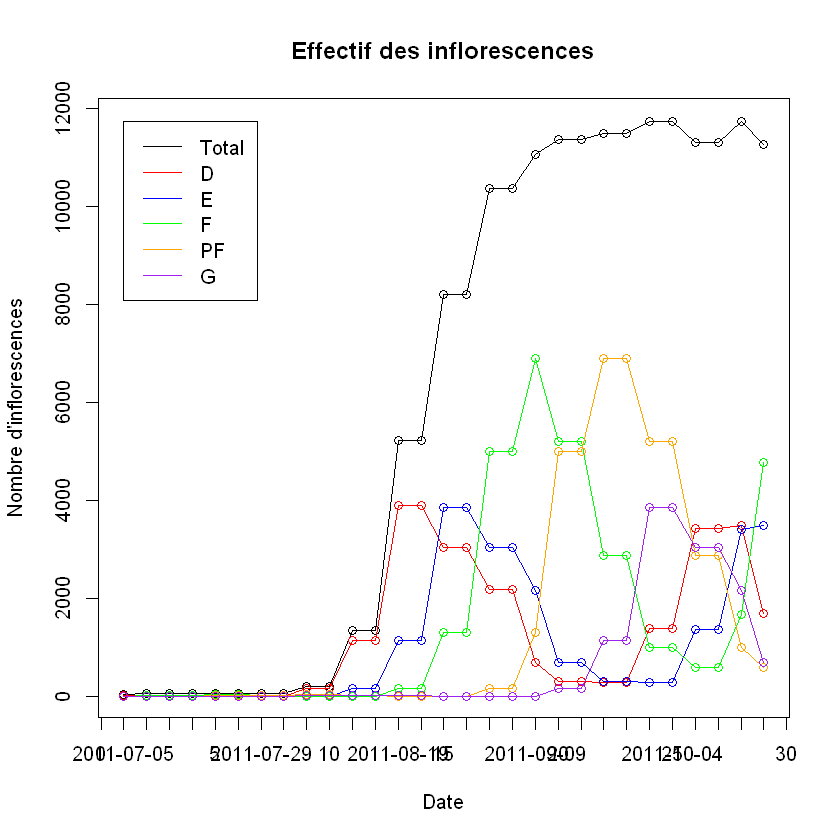

In [7]:
# Affichage des dynamiques de population des inflorescences en fonction de leur stade
plot(NbInflosPar,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:29, lab=as.character(date))
points(NbInflosPar1,type='o',col='red')
points(NbInflosPar2,type='o',col='blue')
points(NbInflosPar3,type='o',col='green')
points(NbInflosPar4,type='o',col='orange')
points(NbInflosPar5,type='o',col='purple')
legend(1, max(NbInflosPar), legend=c("Total","D","E","F","PF","G"),col=c("black","red", "blue","green","orange","purple"), lty=1)
title ("Effectif des inflorescences")

In [21]:
# Premier flush
NbInflosPar1_1 = c()
NbInflosPar2_1 = c()
NbInflosPar3_1 = c()
NbInflosPar4_1 = NbInflosPar4 
NbInflosPar5_1 = NbInflosPar5 
NbInflosPar1_1[1:22] = NbInflosPar1[1:22]
NbInflosPar2_1[1:23] = NbInflosPar2[1:23]
NbInflosPar3_1[1:26] = NbInflosPar3[1:26]
NbInflosPar1_1[23:29] = 0
NbInflosPar2_1[24:29] = 0
NbInflosPar3_1[27:29] = 0

# Deuxieme flush
NbInflosPar1_2 = c()
NbInflosPar2_2 = c()
NbInflosPar3_2 = c()
NbInflosPar1_2[1:22] = 0
NbInflosPar2_2[1:23] = 0
NbInflosPar3_2[1:26] = 0
NbInflosPar1_2[23:29] = NbInflosPar1[23:29] 
NbInflosPar2_2[24:29] = NbInflosPar2[24:29]
NbInflosPar3_2[27:29] = NbInflosPar3[27:29]

# Attractivité des stades
at = c(0.84,1.00,1.13,1.26,1.16)
at = at/max(at)

# Premier flush
Total_1 = NbInflosPar1_1+NbInflosPar2_1+NbInflosPar3_1+NbInflosPar4_1#+NbInflosPar5_1
Total_1_pond = NbInflosPar1_1*at[1]+NbInflosPar2_1*at[2]+NbInflosPar3_1*at[3]+NbInflosPar4_1*at[4]+NbInflosPar5_1*at[5]

# Deuxieme flush
Total_2 = NbInflosPar1_2+NbInflosPar2_2+NbInflosPar3_2
Total_2_pond = NbInflosPar1_2*at[1]+NbInflosPar2_2*at[2]+NbInflosPar3_2*at[3]


	Pearson's product-moment correlation

data:  lambda0_sm and Total_1
t = 13.054, df = 27, p-value = 3.532e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8530847 0.9664937
sample estimates:
      cor 
0.9290982 


	Pearson's product-moment correlation

data:  lambda0_sm and Total_1_pond
t = 10.585, df = 27, p-value = 4.137e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7915989 0.9512215
sample estimates:
      cor 
0.8976682 

[1] "Pondérer la somme des stades du premier flush par l'attractivité des stades ne donne pas une meilleure cinétique. Le coefficient de corrélation est plus faible."


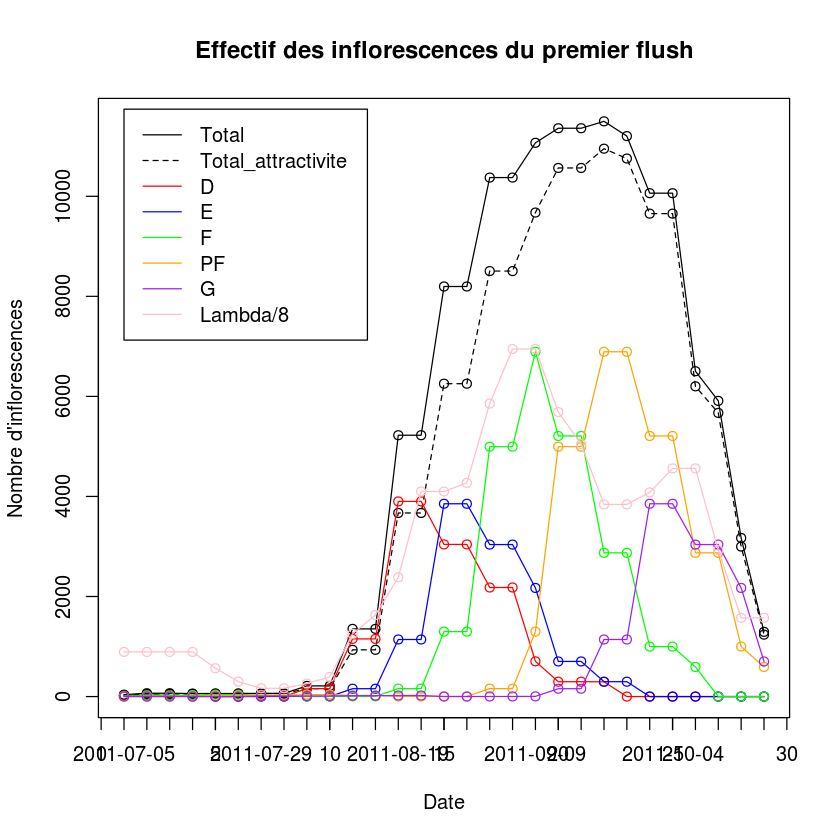

In [70]:
# PREMIER FLUSH . Affichage des dynamiques de population des inflorescences en fonction de leur stade
plot(Total_1,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:29, lab=as.character(date))
points(Total_1_pond,type='o',lty=2)
points(NbInflosPar1_1,type='o',col='red')
points(NbInflosPar2_1,type='o',col='blue')
points(NbInflosPar3_1,type='o',col='green')
points(NbInflosPar4_1,type='o',col='orange')
points(NbInflosPar5_1,type='o',col='purple')
points(lambda0_sm/4,type='o',col='pink')
legend(1, max(NbInflosPar), legend=c("Total","Total_attractivite","D","E","F","PF","G","Lambda/8"),col=c("black","black","red", "blue","green","orange","purple","pink"), lty=c(1,2,1,1,1,1,1,1))
title ("Effectif des inflorescences du premier flush")

print (cor.test(lambda0_sm,Total_1))
print (cor.test(lambda0_sm,Total_1_pond))
print ("Pondérer la somme des stades du premier flush par l'attractivité des stades ne donne pas une meilleure cinétique. Le coefficient de corrélation est plus faible.")

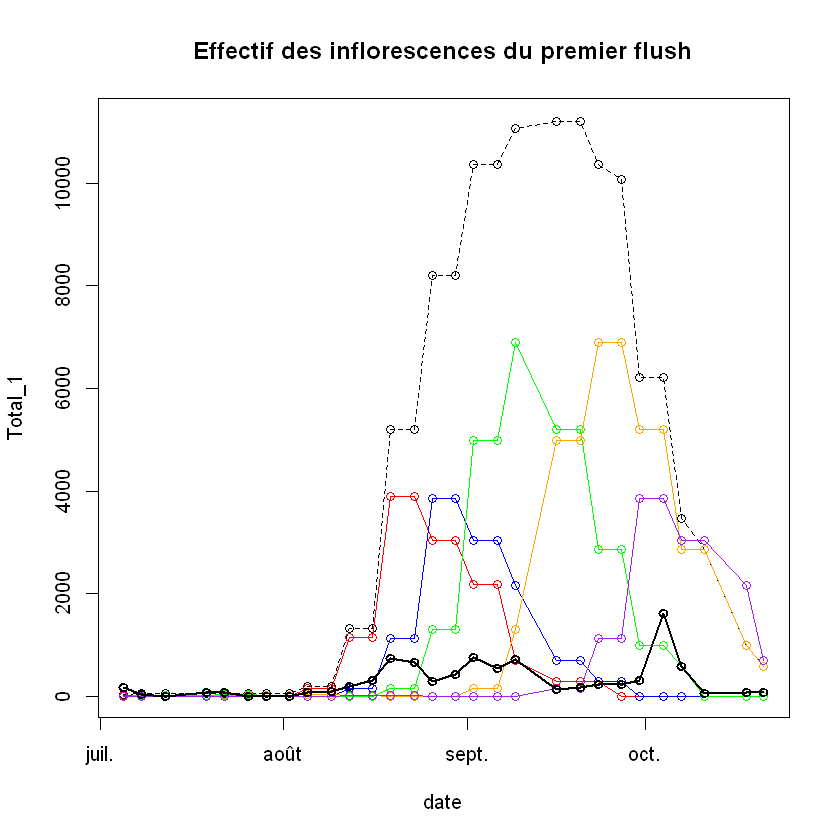

In [72]:
# PREMIER FLUSH . Affichage des dynamiques de population des inflorescences en fonction de leur stade
#plot(Total_1,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
#axis(1,at=1:29, lab=as.character(date))
date = as.Date(date)
interval = date[2:29]-date[1:28]
plot(date, Total_1,type='o',lty=2)
points(date, NbInflosPar1_1,type='o',col='red')
points(date, NbInflosPar2_1,type='o',col='blue')
points(date, NbInflosPar3_1,type='o',col='green')
points(date, NbInflosPar4_1,type='o',col='orange')
points(date, NbInflosPar5_1,type='o',col='purple')
#points(date-7, lambda0_sm/4,type='o',col='black',lwd=3)
dailylarva = larves/c(1,interval)
points(date,dailylarva ,type='o',col='black',lwd=2)
#points(date-7,dailylarva ,type='o',col='black',lwd=2)
legend(1, max(NbInflosPar), legend=c("Total","Total_attractivite","D","E","F","PF","G","Lambda/8"),col=c("black","black","red", "blue","green","orange","purple","pink"), lty=c(1,2,1,1,1,1,1,1))
title ("Effectif des inflorescences du premier flush")



In [64]:
larves_split = split(Larv.df,Larv.df$Date)
z = larves_split[[15]]
sum(z$NbLarv)

[1] 889

In [66]:
larves_split = split(Larv.df,Larv.df$Date)
z = larves_split[9]$`2011-08-05`
print(z)
sum(z$NbLarv)

         Date Arb Moit stade NbLarv
62 2011-08-05 A06  bas   FPF      1
63 2011-08-05 A06 haut   PFG     36
64 2011-08-05 A08  bas   PFG      0
65 2011-08-05 A17 haut     D     24
66 2011-08-05 A19  bas   PFG      0
67 2011-08-05 A22 haut     D      2
68 2011-08-05 C10  bas   PFG     23
69 2011-08-05 C18 haut     D     46
70 2011-08-05 E11 haut     D     45
71 2011-08-05 G21 haut   PFG      1
72 2011-08-05 Z10 haut     E     65
73 2011-08-05 Z11 haut     D      2


[1] 245

In [70]:
mean(Larv.df[Larv.df$stade == 'D',]$NbLarv)
mean(Larv.df[Larv.df$stade == 'E',]$NbLarv)
mean(Larv.df[Larv.df$stade == 'FPF',]$NbLarv)
mean(Larv.df[Larv.df$stade == 'PFG',]$NbLarv)
mean(Larv.df[Larv.df$stade == 'G',]$NbLarv)



[1] 8.562219

[1] 10.03588

[1] 9.055901

[1] 6.832078

[1] 8.10515


	Pearson's product-moment correlation

data:  lambda0_sm and Total_1 * 0.8 + Total_2 * 0.2
t = 13.567, df = 27, p-value = 1.425e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8625655 0.9687792
sample estimates:
      cor 
0.9338488 


	Pearson's product-moment correlation

data:  lambda0_sm and Total_1 * 0.6 + Total_2 * 0.4
t = 11.253, df = 27, p-value = 1.064e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8113522 0.9562147
sample estimates:
      cor 
0.9078846 


	Pearson's product-moment correlation

data:  lambda0_sm and Total_1 * 0.4 + Total_2 * 0.6
t = 5.6853, df = 27, p-value = 4.867e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5094689 0.8694382
sample estimates:
      cor 
0.7381456 


	Pearson's product-moment correlation

data:  lambda0_sm and Total_1 * 0.2 + Total_2 * 0.8
t = 1.8767, df = 27, p-value = 0.0714
alternative 

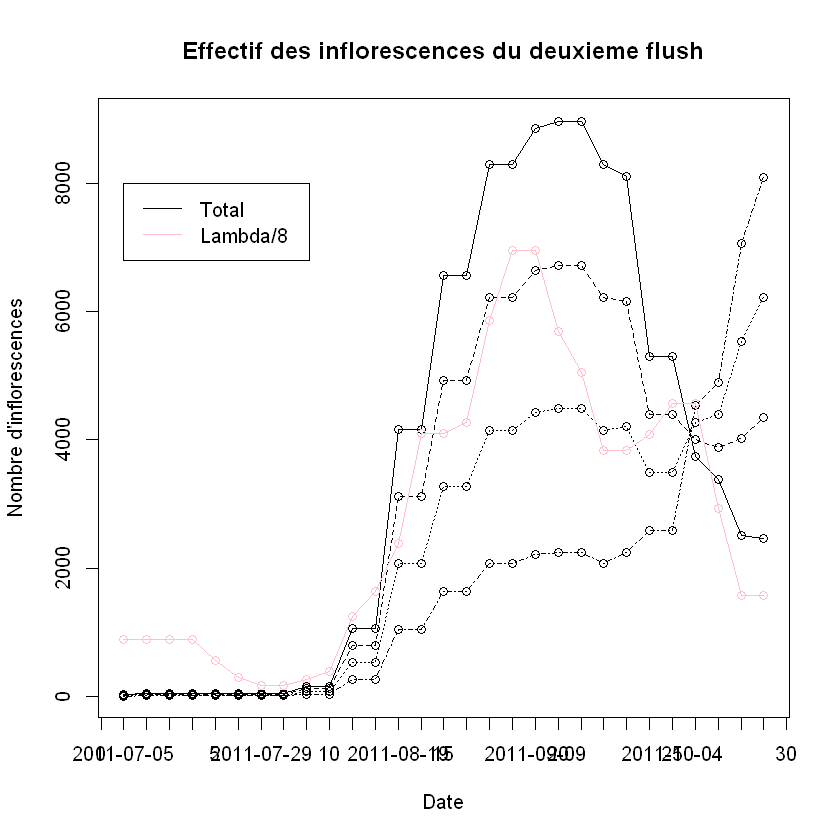

In [67]:
# LES DEUX FLUSH PONDERES. Affichage des dynamiques de population des inflorescences en fonction de leur stade
plot(Total_1*0.8+Total_2*0.2,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
points(Total_1*0.6+Total_2*0.4,type='o',lty=2)
points(Total_1*0.4+Total_2*0.6,type='o',lty=3)
points(Total_1*0.2+Total_2*0.8,type='o',lty=4)
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/4,type='o',col='pink')
legend(1, 8000, legend=c("Total","Lambda/8"),col=c("black","pink"), lty=1)
title ("Effectif des inflorescences du deuxieme flush")

print (cor.test(lambda0_sm,Total_1*0.8+Total_2*0.2))
print (cor.test(lambda0_sm,Total_1*0.6+Total_2*0.4))
print (cor.test(lambda0_sm,Total_1*0.4+Total_2*0.6))
print (cor.test(lambda0_sm,Total_1*0.2+Total_2*0.8))

print ("Pondérer les flushs ne semblent pas améliorer la corrélation avec le lambda.")


	Pearson's product-moment correlation

data:  lambda0_sm and Total
t = 12.313, df = 27, p-value = 1.375e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8376607 0.9627366
sample estimates:
      cor 
0.9213157 


	Pearson's product-moment correlation

data:  lambda0_sm and Total_pond
t = 11.105, df = 27, p-value = 1.432e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8072019 0.9551726
sample estimates:
      cor 
0.9057475 

[1] "Enlever le stade G ne donne pas une meilleure cinétique. Le coefficient de corrélation est presque identique"


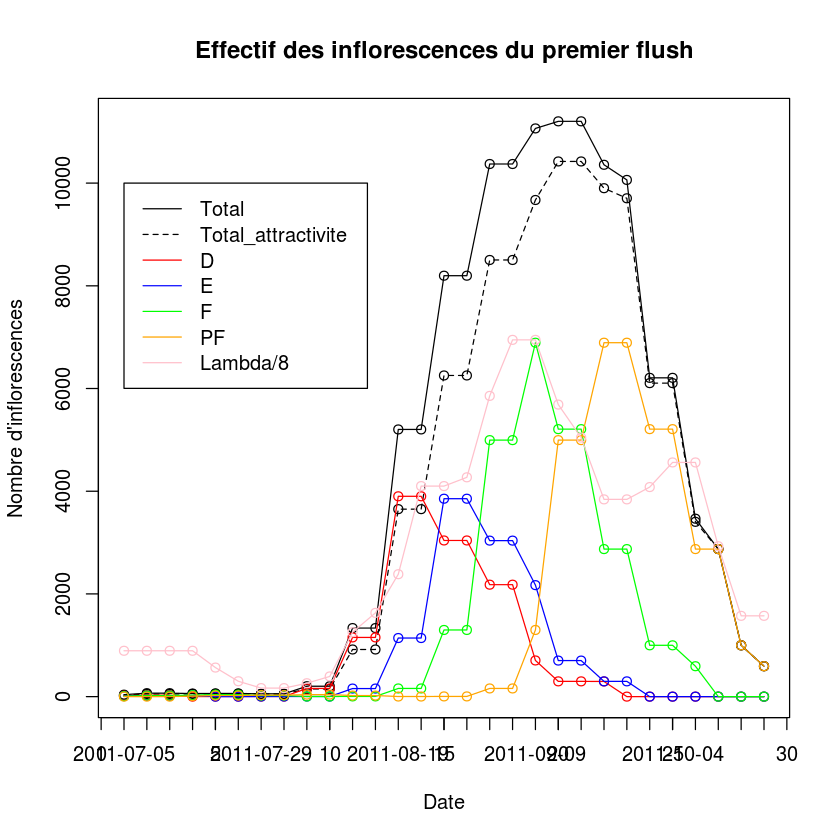

In [57]:
## MEME CHOSE SANS LE G !! 

Total = NbInflosPar1_1+NbInflosPar2_1+NbInflosPar3_1+NbInflosPar4
Total_pond = NbInflosPar1_1*at[1]+NbInflosPar2_1*at[2]+NbInflosPar3_1*at[3]+NbInflosPar4*at[4]

# Affichage des dynamiques de population des inflorescences en fonction de leur stade
plot(Total,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:29, lab=as.character(date))
points(Total_pond,type='o',lty=2)
points(NbInflosPar1_1,type='o',col='red')
points(NbInflosPar2_1,type='o',col='blue')
points(NbInflosPar3_1,type='o',col='green')
points(NbInflosPar4,type='o',col='orange')
points(lambda0_sm/4,type='o',col='pink')
legend(1, 10000, legend=c("Total","Total_attractivite","D","E","F","PF","Lambda/8"),col=c("black","black","red", "blue","green","orange","pink"), lty=c(1,2,1,1,1,1,1,1))
title ("Effectif des inflorescences du premier flush")

print (cor.test(lambda0_sm,Total))
print (cor.test(lambda0_sm,Total_pond))
print ("Enlever le stade G ne donne pas une meilleure cinétique. Le coefficient de corrélation est presque identique")

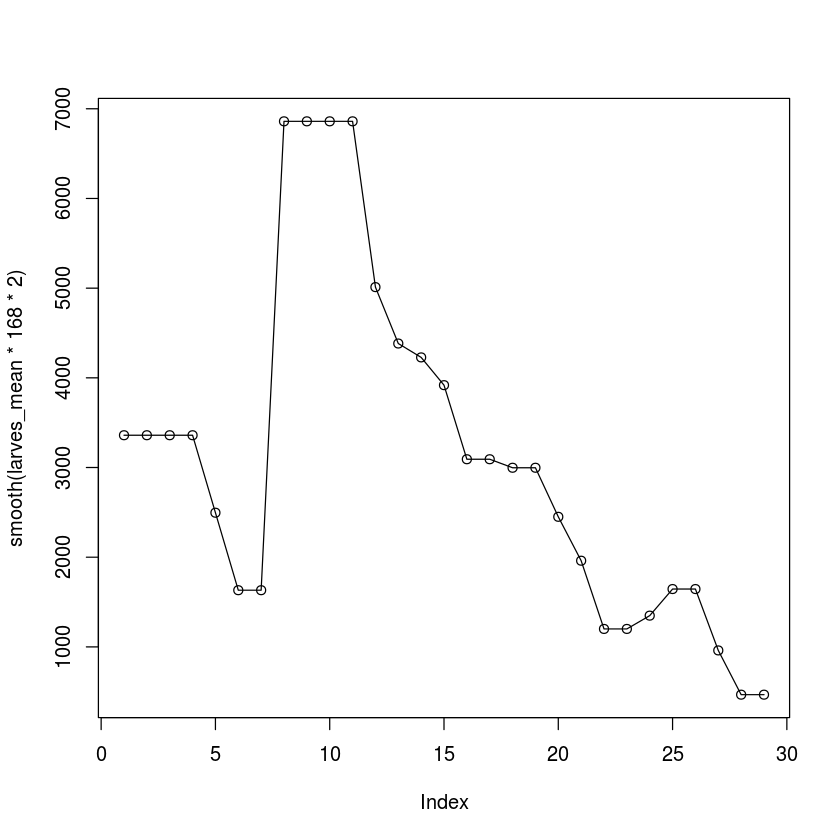

In [60]:
plot(smooth(larves_mean*168*2),type='o')

In [9]:
iE = 10
while(NbInflosPar1[iE]>NbInflosPar2[iE])
    iE = iE+1

iF = iE+1
while(NbInflosPar2[iF]>NbInflosPar3[iF])
    iF = iF+1

iPF = iF+1
while(NbInflosPar3[iPF]>NbInflosPar4[iPF])
    iPF = iPF+1

iG = iPF+1
while(NbInflosPar4[iG]>NbInflosPar5[iG])
    iG = iG+1

NbInfloDEFPFG = c(NbInflosPar1[1:(iE-1)],NbInflosPar2[iE:(iF-1)],NbInflosPar3[iF:(iPF-1)],NbInflosPar4[iPF:(iG-1)],NbInflosPar5[iG:29])

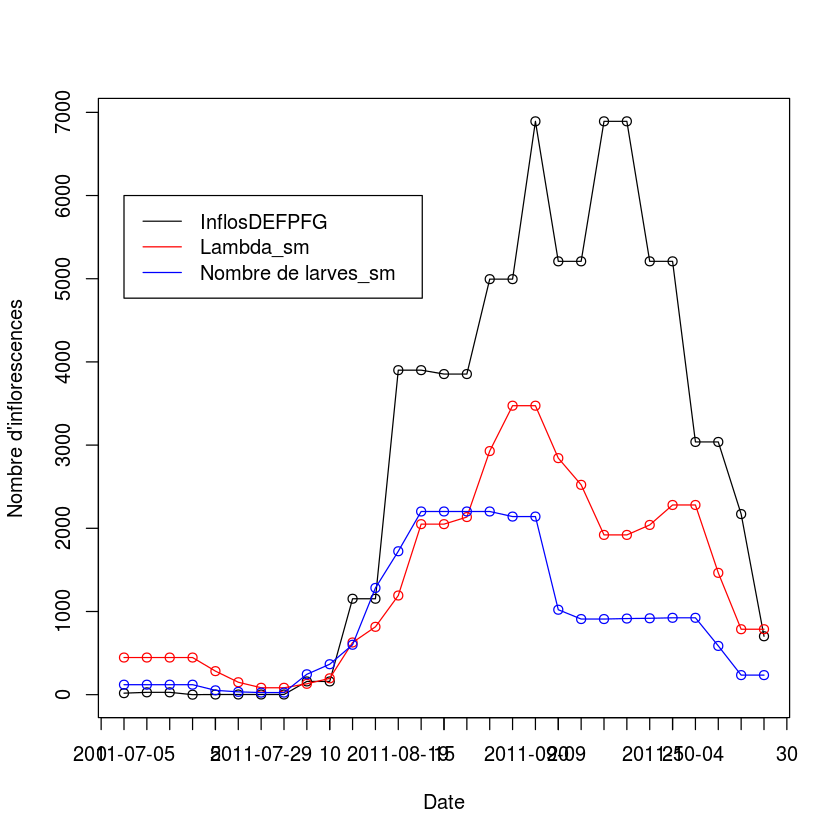


Call:
lm(formula = lambda0_sm ~ NbInfloDEFPFG)

Coefficients:
  (Intercept)  NbInfloDEFPFG  
     2678.510          3.111  


	Pearson's product-moment correlation

data:  lambda0_sm and NbInfloDEFPFG
t = 10.408, df = 27, p-value = 5.974e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7859080 0.9497673
sample estimates:
      cor 
0.8947035 


	Pearson's product-moment correlation

data:  lambda0_sm and smooth(larves)
t = 6.9613, df = 27, p-value = 1.757e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6156985 0.9027358
sample estimates:
      cor 
0.8013695 



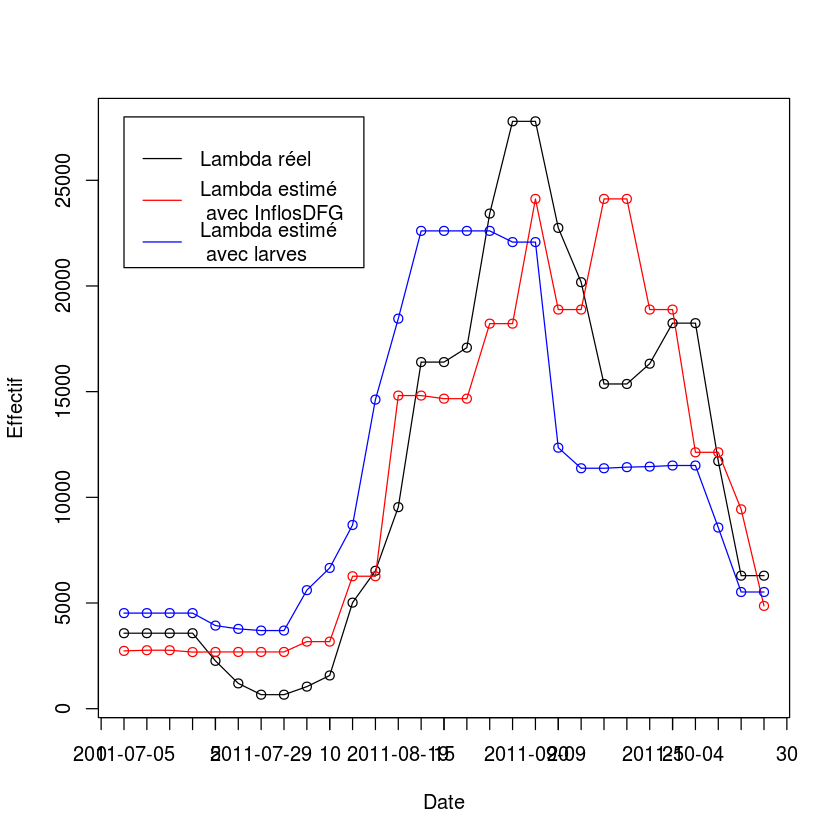

In [10]:
plot(NbInfloDEFPFG,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:29, lab=as.character(date))
points(smooth(lambda0)/8,type='o',col='red')
points(smooth(larves),col='blue',type='o')
legend(1,6000,legend=c("InflosDEFPFG","Lambda_sm","Nombre de larves_sm"),col=c("black","red","blue"),lty=1)


plot(lambda0_sm,type='o',xlab='Date',ylab='Effectif')
fit = lm(lambda0_sm~NbInfloDEFPFG)
print(fit)
points(NbInfloDEFPFG*fit$coef[2]+fit$coef[1],type='o',col='red')
fit = lm(lambda0_sm~smooth(larves))
points(smooth(larves)*fit$coef[2]+fit$coef[1],type='o',col='blue')

axis(1,at=1:29, lab=as.character(date))
legend(1, 28000, legend=c("Lambda réel","Lambda estimé \n avec InflosDFG","Lambda estimé \n avec larves"),col=c("black","red","blue"), lty=1)

print (cor.test(lambda0_sm,NbInfloDEFPFG))
print (cor.test(lambda0_sm,smooth(larves))) 

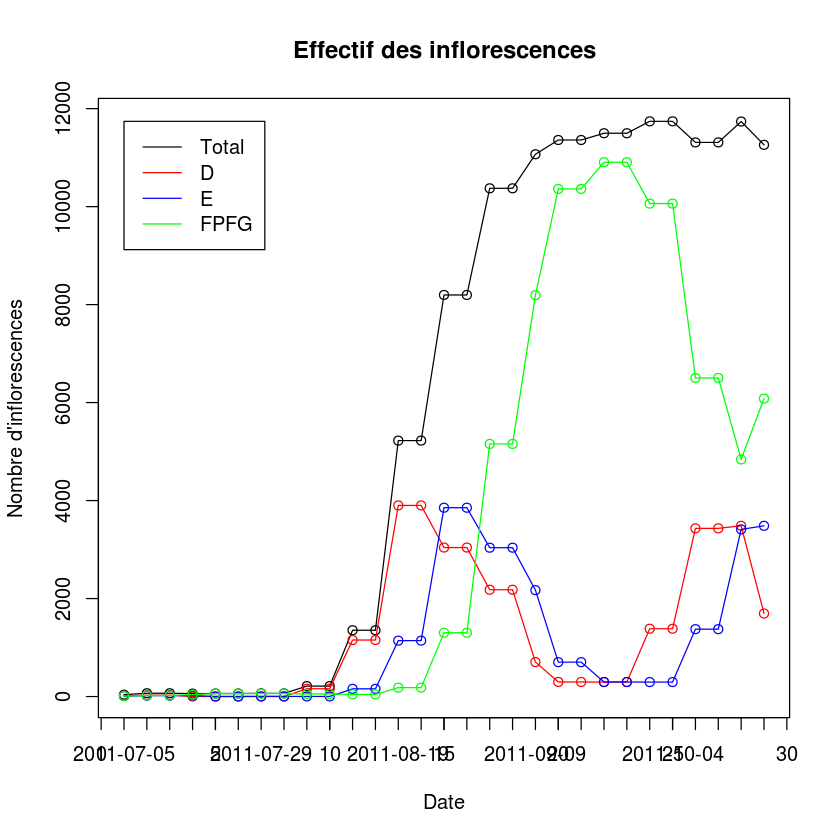

In [11]:
# Affichage des dynamiques de population des inflorescences en fonction de leur stade
plot(NbInflosPar,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:29, lab=as.character(date))
points(NbInflosPar1,type='o',col='red')
points(NbInflosPar2,type='o',col='blue')
points(NbInflosPar3+NbInflosPar4+NbInflosPar5,type='o',col='green')
legend(1, max(NbInflosPar), legend=c("Total","D","E","FPFG"),col=c("black","red", "blue","green"), lty=1)
title ("Effectif des inflorescences")

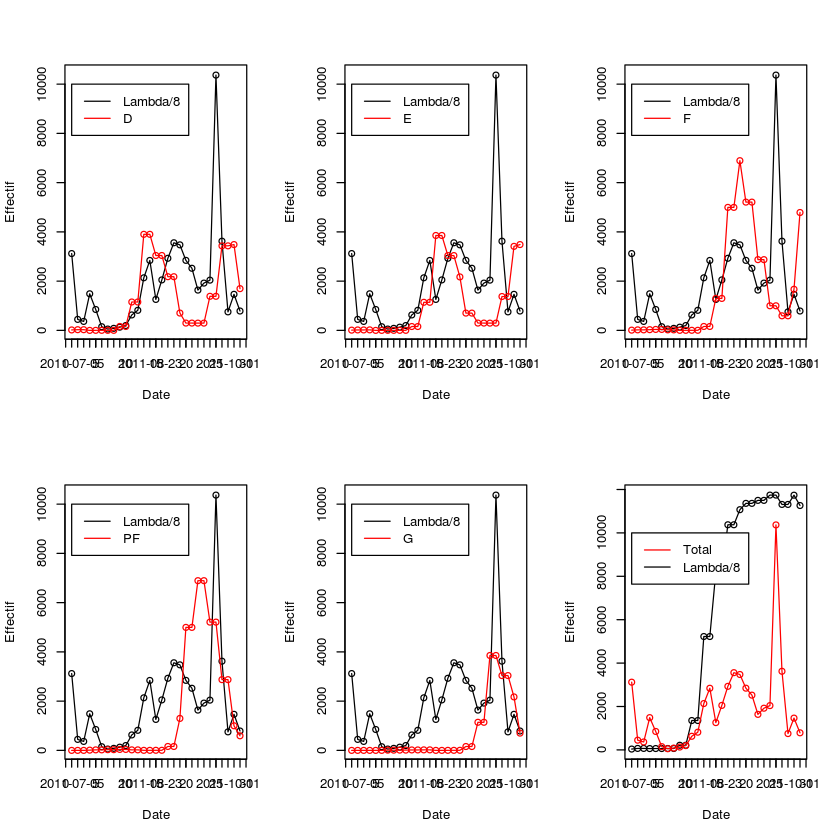

In [12]:
# Affichage des courbes de cécidomyies et d'inflorescences en fonction du stade superposées

# On divise le lambda par 8 pour avoir une bonne visibilité des courbes des inflorescences
# et des cécidomyies sur un même graphe.

par(mfrow=c(2,3))

plot(lambda0/8,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:29, lab=as.character(date))
points(NbInflosPar1,type='o',col='red')
legend(1, 10000, legend=c("Lambda/8","D"),col=c("black","red"), lty=1)

plot(lambda0/8,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:29, lab=as.character(date))
points(NbInflosPar2,type='o',col='red')
legend(1, 10000, legend=c("Lambda/8","E"),col=c("black","red"), lty=1)

plot(lambda0/8,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:29, lab=as.character(date))
points(NbInflosPar3,type='o',col='red')
legend(1, 10000, legend=c("Lambda/8","F"),col=c("black","red"), lty=1)

plot(lambda0/8,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:29, lab=as.character(date))
points(NbInflosPar4,type='o',col='red')
legend(1, 10000, legend=c("Lambda/8","PF"),col=c("black","red"), lty=1)

plot(lambda0/8,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:29, lab=as.character(date))
points(NbInflosPar5,type='o',col='red')
legend(1, 10000, legend=c("Lambda/8","G"),col=c("black","red"), lty=1)

plot(NbInflosPar,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o',col='red')
legend(1, 10000, legend=c("Total","Lambda/8"),col=c("red","black"), lty=1)

## Lissage des données et affichage

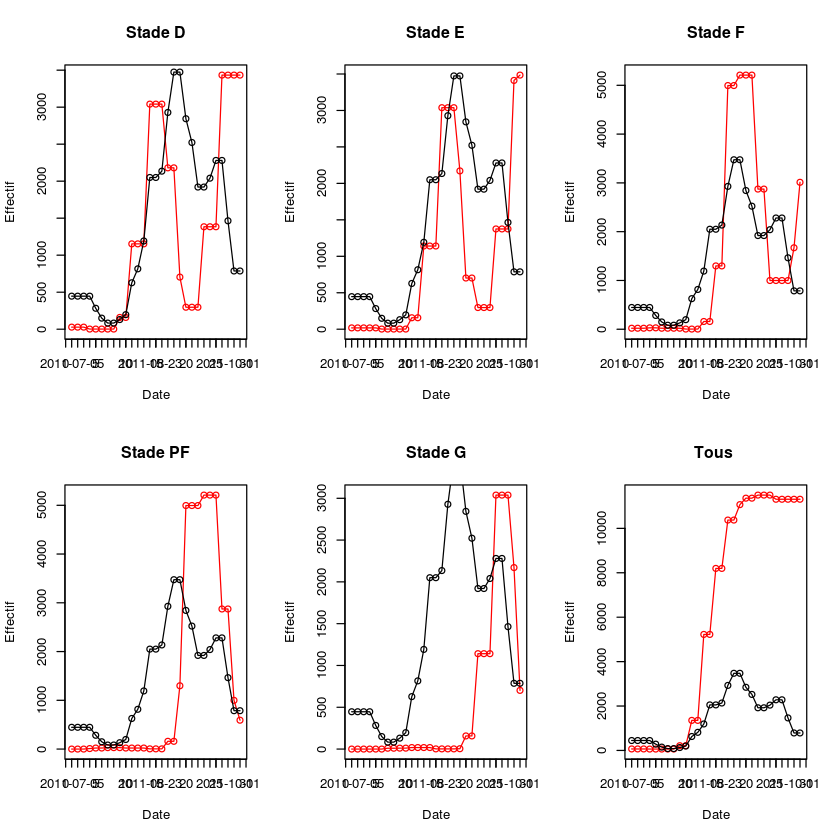

In [13]:
# Lissage des données
lambda0_sm = smooth(lambda0)
NbInflosPar1_sm = smooth(NbInflosPar1)
NbInflosPar2_sm = smooth(NbInflosPar2)
NbInflosPar3_sm = smooth(NbInflosPar3)
NbInflosPar4_sm = smooth(NbInflosPar4)
NbInflosPar5_sm = smooth(NbInflosPar5)
NbInflosPar_sm  = smooth(NbInflosPar)

par(mfrow=c(2,3))

plot(NbInflosPar1_sm,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Stade D")

plot(NbInflosPar2_sm,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Stade E")

plot(NbInflosPar3_sm,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Stade F")

plot(NbInflosPar4_sm,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Stade PF")

plot(NbInflosPar5_sm,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Stade G")

plot(NbInflosPar_sm,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Tous ")

De ces graphes, on remarque que le premier pic des cécidomyies correspond au premier pic des inflorescences au stade D, le deuxième pic à celui des inflorescences du stade F et le dernier pic à celui des inflorescences du stade G. A la fin, les cécidomyies diminuent, comme les inflorescences du stade G. 

## Coefficients de correlation

In [14]:
library(stats)

c1 = cor.test(lambda0,NbInflosPar1)
c2 = cor.test(lambda0,NbInflosPar2)
c3 = cor.test(lambda0,NbInflosPar3)
c4 = cor.test(lambda0,NbInflosPar4)
c5 = cor.test(lambda0,NbInflosPar5)

c = matrix(0,5,2)
rownames(c) = c("D","E","F","PF","G")
colnames(c) = c("coef","p-value")
c[1,1] = c1$estimate
c[2,1] = c2$estimate
c[3,1] = c3$estimate
c[4,1] = c4$estimate
c[5,1] = c5$estimate
c[1,2] = c1$p.value
c[2,2] = c2$p.value
c[3,2] = c3$p.value
c[4,2] = c4$p.value
c[5,2] = c5$p.value

print("Coefficients de correlation Lambda / Inflorescences")
print(c)

c1_sm = cor.test(lambda0_sm,NbInflosPar1_sm)
c2_sm = cor.test(lambda0_sm,NbInflosPar2_sm)
c3_sm = cor.test(lambda0_sm,NbInflosPar3_sm)
c4_sm = cor.test(lambda0_sm,NbInflosPar4_sm)
c5_sm = cor.test(lambda0_sm,NbInflosPar5_sm)

c_sm = matrix(0,5,2)
rownames(c_sm) = c("D","E","F","PF","G")
colnames(c_sm) = c("coef","p-value")
c_sm[1,1] = c1_sm$estimate
c_sm[2,1] = c2_sm$estimate
c_sm[3,1] = c3_sm$estimate
c_sm[4,1] = c4_sm$estimate
c_sm[5,1] = c5_sm$estimate
c_sm[1,2] = c1_sm$p.value
c_sm[2,2] = c2_sm$p.value
c_sm[3,2] = c3_sm$p.value
c_sm[4,2] = c4_sm$p.value
c_sm[5,2] = c5_sm$p.value

print("Coefficients de correlation Lambda / Inflorescences avec ces données lissées")
print(c_sm)

[1] "Coefficients de correlation Lambda / Inflorescences"
        coef     p-value
D  0.2321654 0.225551547
E  0.1339103 0.488599661
F  0.2907590 0.125970471
PF 0.4148507 0.025240995
G  0.4812515 0.008217174
[1] "Coefficients de correlation Lambda / Inflorescences avec ces données lissées"
        coef      p-value
D  0.4112091 2.668479e-02
E  0.5427975 2.347194e-03
F  0.8051647 1.386896e-07
PF 0.4947783 6.360326e-03
G  0.2041117 2.882097e-01


Pour les données non lissées, les coefficients de corrélation sont tous inférieurs à 0.5 avec des p-value plutôt élévées. Sauf pour le stade G, la p-value est faible et le taux de corrélation s'approche de 0.5.

Pour les données lissées, les coefficients de corrélation sont plus élévés que ceux des données non lissées et les p-value plus faible sauf pour le stade G. Le coefficient de corrélation est le plus élevé pour le stade F avec une p-value très faible 

## Groupement de stades successifs 2 à 2.

[1] "Données non lissées"
[1] "Taux de correlation : "
      cor 
0.2010668 
[1] "p-value : "
[1] 0.2956172


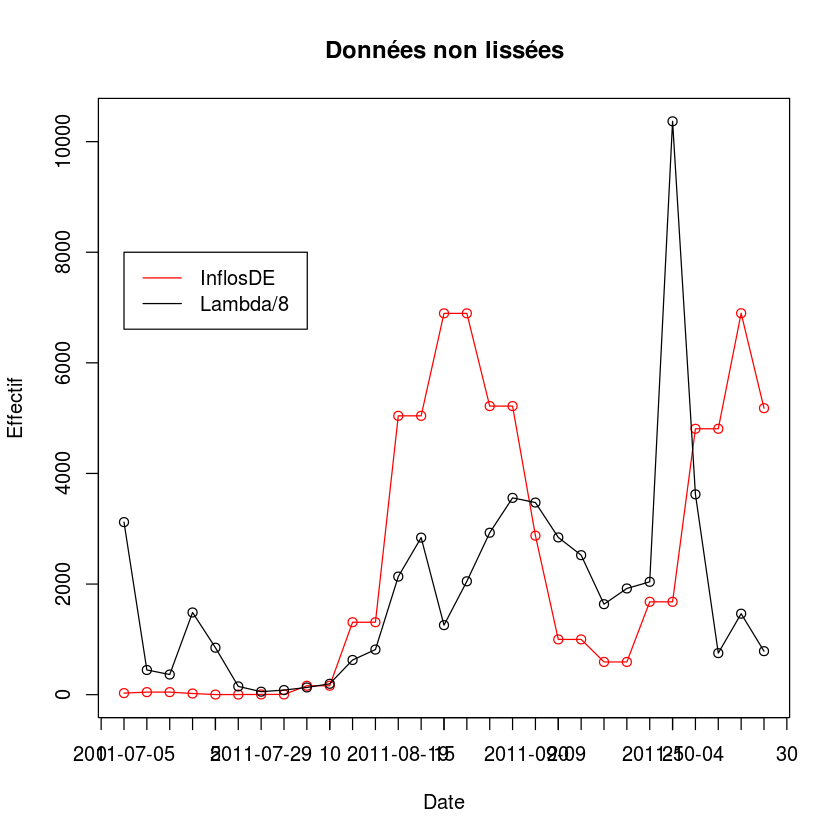

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.5052799 
[1] "p-value : "
[1] 0.00517632


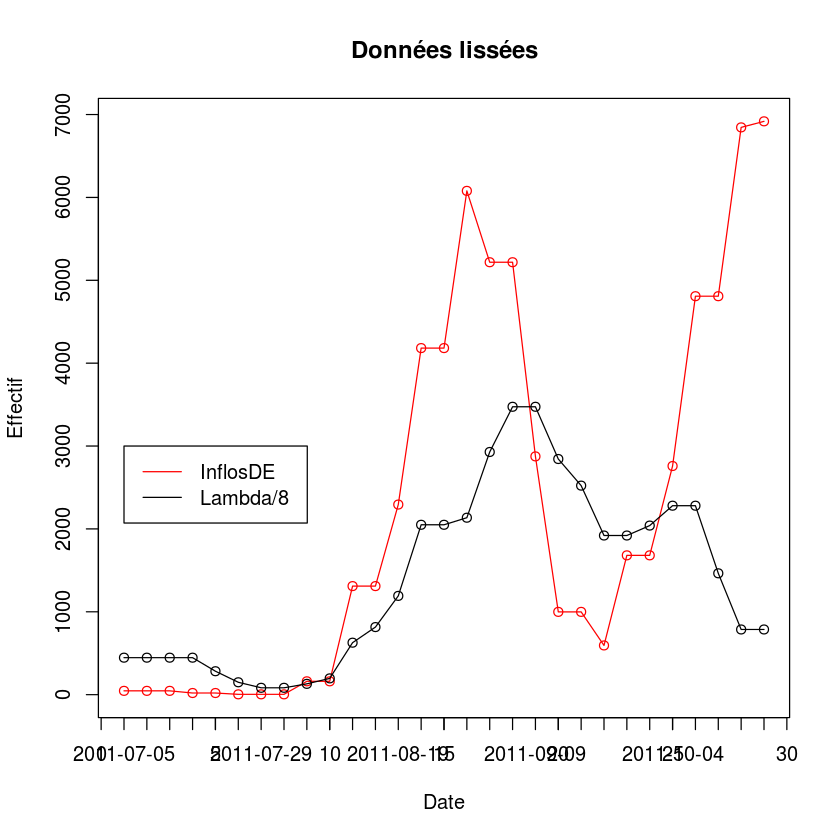

In [15]:
# Stades D+E

InflosDE = NbInflosPar1 + NbInflosPar2
plot(InflosDE,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosDE)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 8000, legend=c("InflosDE","Lambda/8"),col=c("red","black"), lty=1)
c_DE = cor.test(InflosDE,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_DE$estimate)
print ("p-value : ")
print (c_DE$p.value)


InflosDE_sm = NbInflosPar1_sm + NbInflosPar2_sm
plot(InflosDE_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosDE_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosDE","Lambda/8"),col=c("red","black"), lty=1)
c_DE_sm = cor.test(InflosDE_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_DE_sm$estimate)
print ("p-value : ")
print (c_DE_sm$p.value)

[1] "Données non lissées"
[1] "Taux de correlation : "
     cor 
0.263205 
[1] "p-value : "
[1] 0.1677341


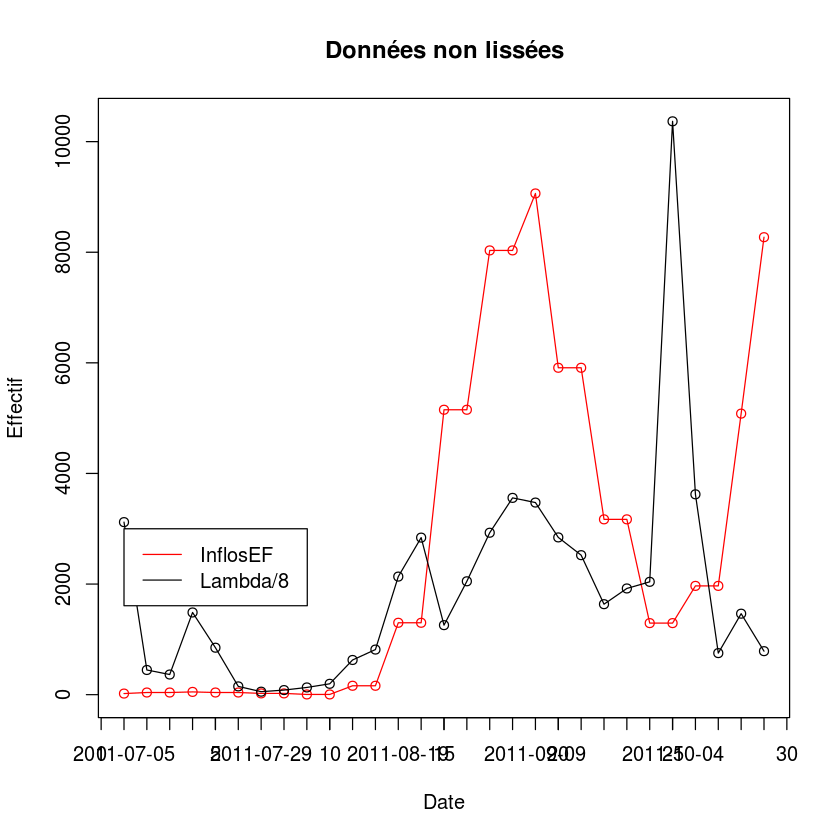

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.7950334 
[1] "p-value : "
[1] 2.577566e-07


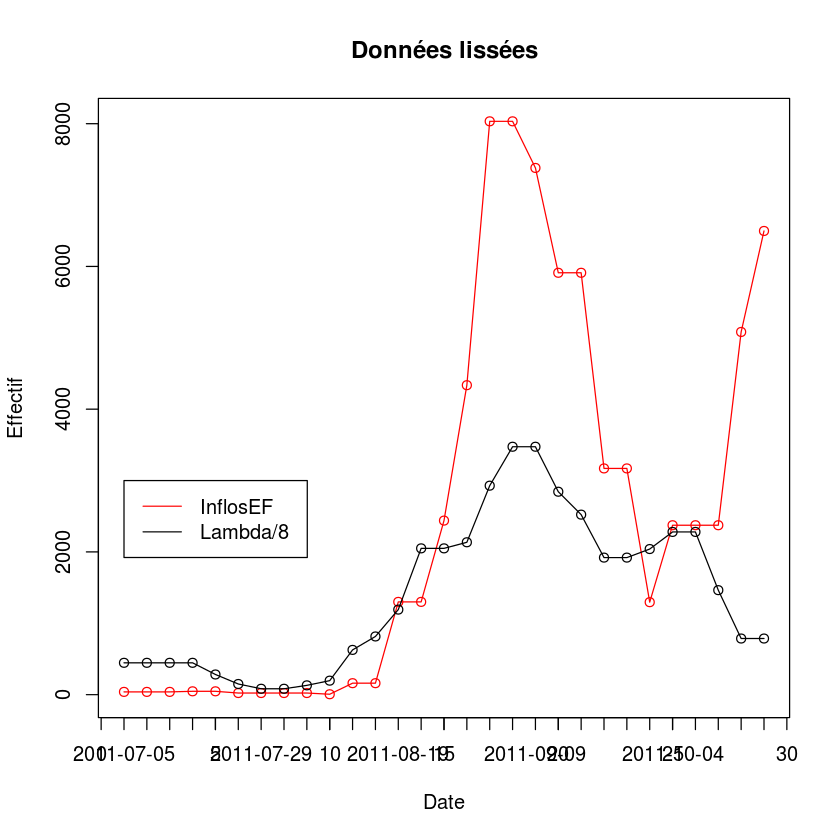

In [16]:
# Stades E+F

InflosEF = NbInflosPar2 + NbInflosPar3
plot(InflosEF,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosEF)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 3000, legend=c("InflosEF","Lambda/8"),col=c("red","black"), lty=1)
c_EF = cor.test(InflosEF,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_EF$estimate)
print ("p-value : ")
print (c_EF$p.value)


InflosEF_sm = NbInflosPar2_sm + NbInflosPar3_sm
plot(InflosEF_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosEF_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosEF","Lambda/8"),col=c("red","black"), lty=1)
c_EF_sm = cor.test(InflosEF_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_EF_sm$estimate)
print ("p-value : ")
print (c_EF_sm$p.value)

[1] "Données non lissées"
[1] "Taux de correlation : "
      cor 
0.4294343 
[1] "p-value : "
[1] 0.02008299


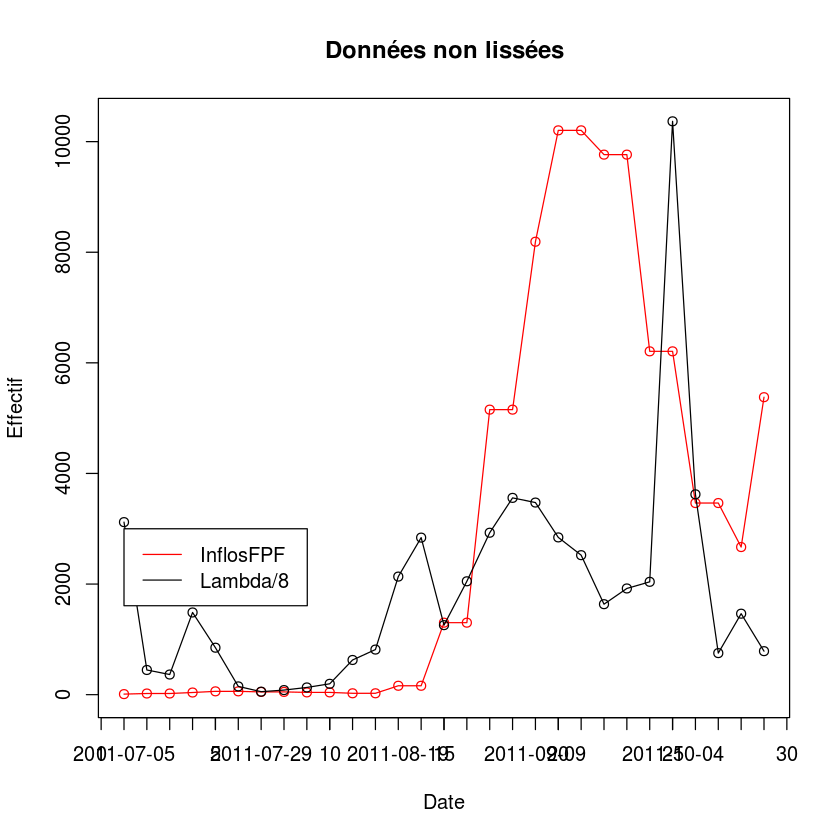

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.7560023 
[1] "p-value : "
[1] 2.108085e-06


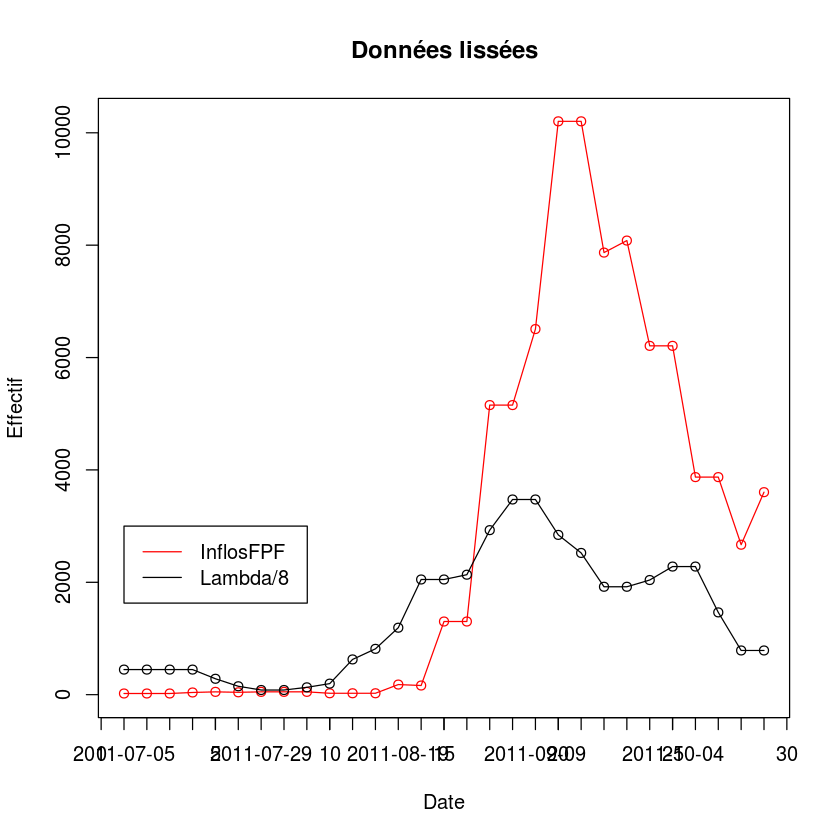

In [17]:
# Stades F+PF

InflosFPF = NbInflosPar3 + NbInflosPar4
plot(InflosFPF,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosFPF)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 3000, legend=c("InflosFPF","Lambda/8"),col=c("red","black"), lty=1)
c_FPF = cor.test(InflosFPF,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_FPF$estimate)
print ("p-value : ")
print (c_FPF$p.value)


InflosFPF_sm = NbInflosPar3_sm + NbInflosPar4_sm
plot(InflosFPF_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosFPF_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosFPF","Lambda/8"),col=c("red","black"), lty=1)
c_FPF_sm = cor.test(InflosFPF_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_FPF_sm$estimate)
print ("p-value : ")
print (c_FPF_sm$p.value)

[1] "Données non lissées"
[1] "Taux de correlation : "
      cor 
0.4843712 
[1] "p-value : "
[1] 0.007752729


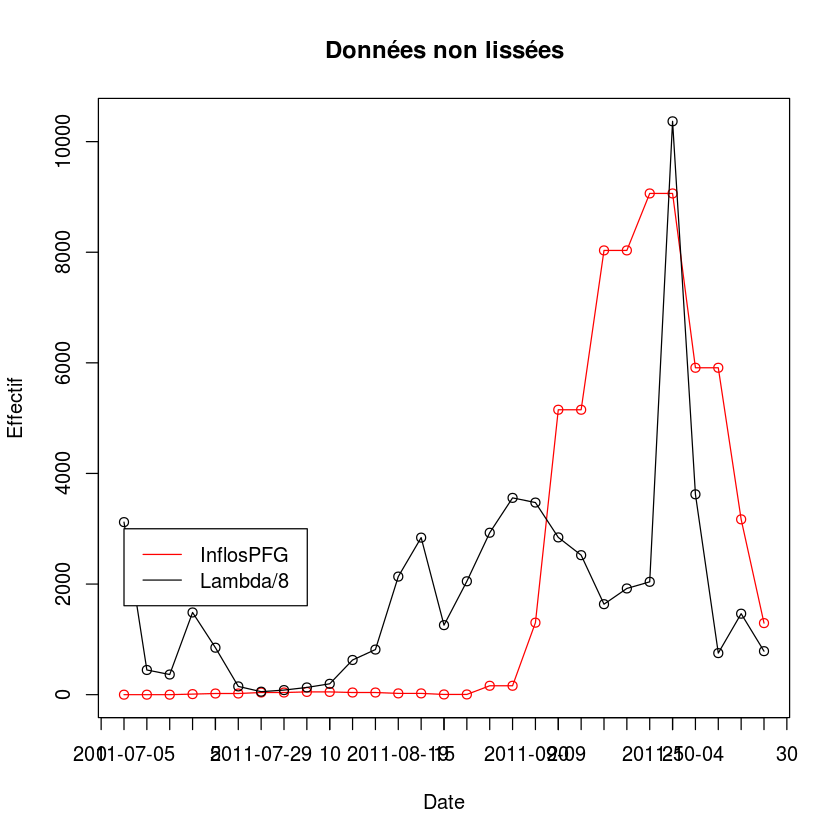

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.4444357 
[1] "p-value : "
[1] 0.01571545


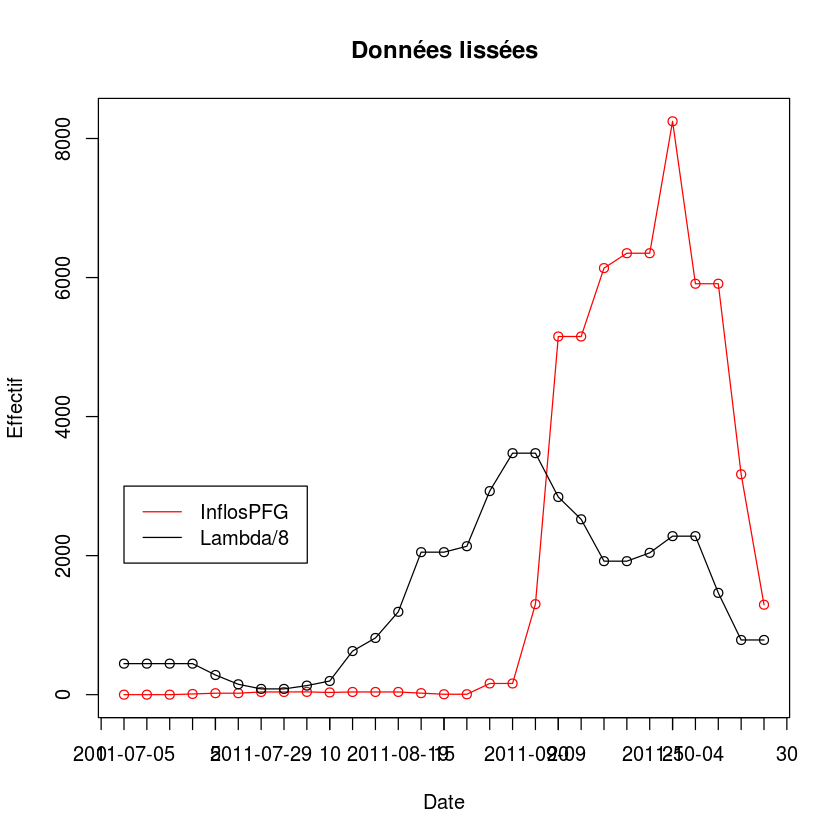

In [18]:
# Stades PF+G

InflosPFG = NbInflosPar4 + NbInflosPar5
plot(InflosPFG,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosPFG)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 3000, legend=c("InflosPFG","Lambda/8"),col=c("red","black"), lty=1)
c_PFG = cor.test(InflosPFG,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_PFG$estimate)
print ("p-value : ")
print (c_PFG$p.value)


InflosPFG_sm = NbInflosPar4_sm + NbInflosPar5_sm
plot(InflosPFG_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosPFG_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosPFG","Lambda/8"),col=c("red","black"), lty=1)
c_PFG_sm = cor.test(InflosPFG_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_PFG_sm$estimate)
print ("p-value : ")
print (c_PFG_sm$p.value)

## Groupement de stades successifs 3 à 3.

[1] "Données non lissées"
[1] "Taux de correlation : "
      cor 
0.3019974 
[1] "p-value : "
[1] 0.1113396


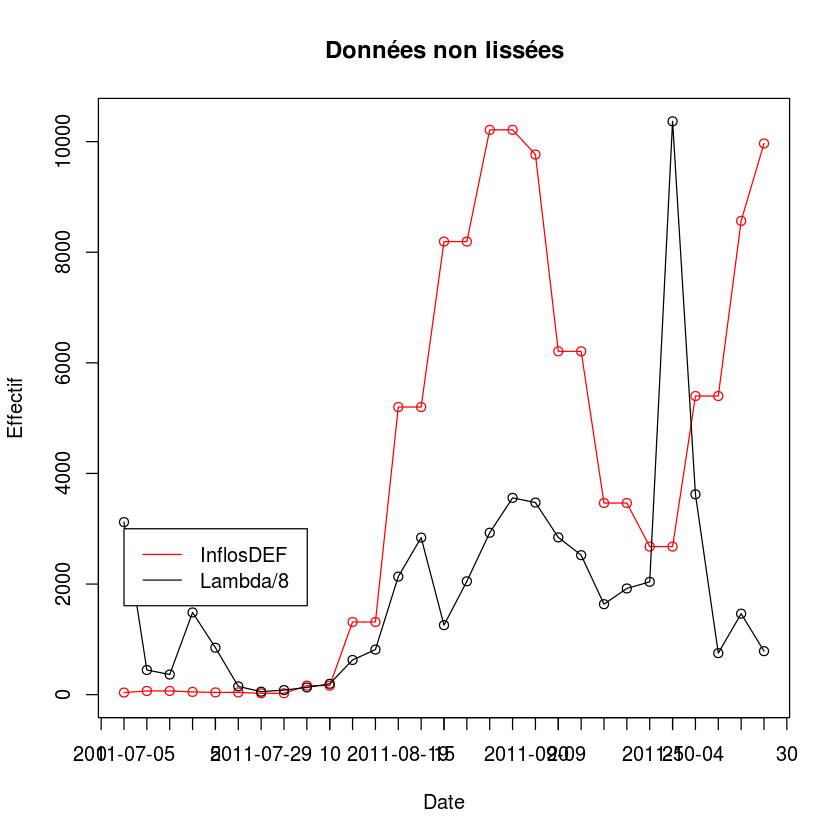

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.7694553 
[1] "p-value : "
[1] 1.069745e-06


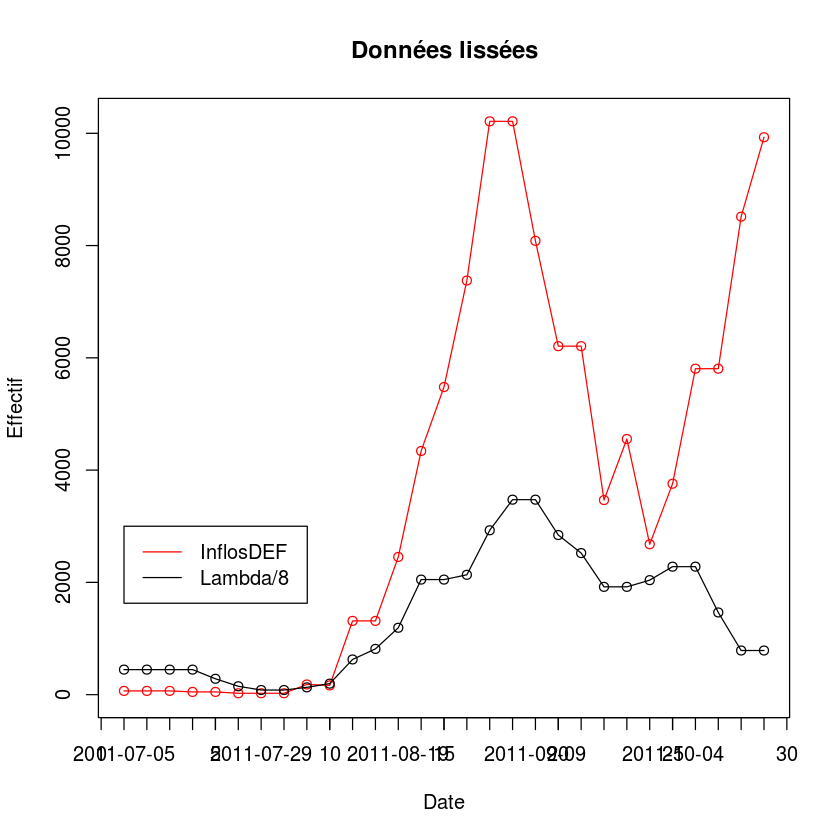

In [19]:
# Stades D+E+F

InflosDEF = NbInflosPar1 + NbInflosPar2 + NbInflosPar3
plot(InflosDEF,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosDEF)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 3000, legend=c("InflosDEF","Lambda/8"),col=c("red","black"), lty=1)
c_DEF = cor.test(InflosDEF,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_DEF$estimate)
print ("p-value : ")
print (c_DEF$p.value)


InflosDEF_sm = NbInflosPar1_sm + NbInflosPar2_sm + NbInflosPar3_sm
plot(InflosDEF_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosDEF_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosDEF","Lambda/8"),col=c("red","black"), lty=1)
c_DEF_sm = cor.test(InflosDEF_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_DEF_sm$estimate)
print ("p-value : ")
print (c_DEF_sm$p.value)

[1] "Données non lissées"
[1] "Taux de correlation : "
     cor 
0.424951 
[1] "p-value : "
[1] 0.02156683


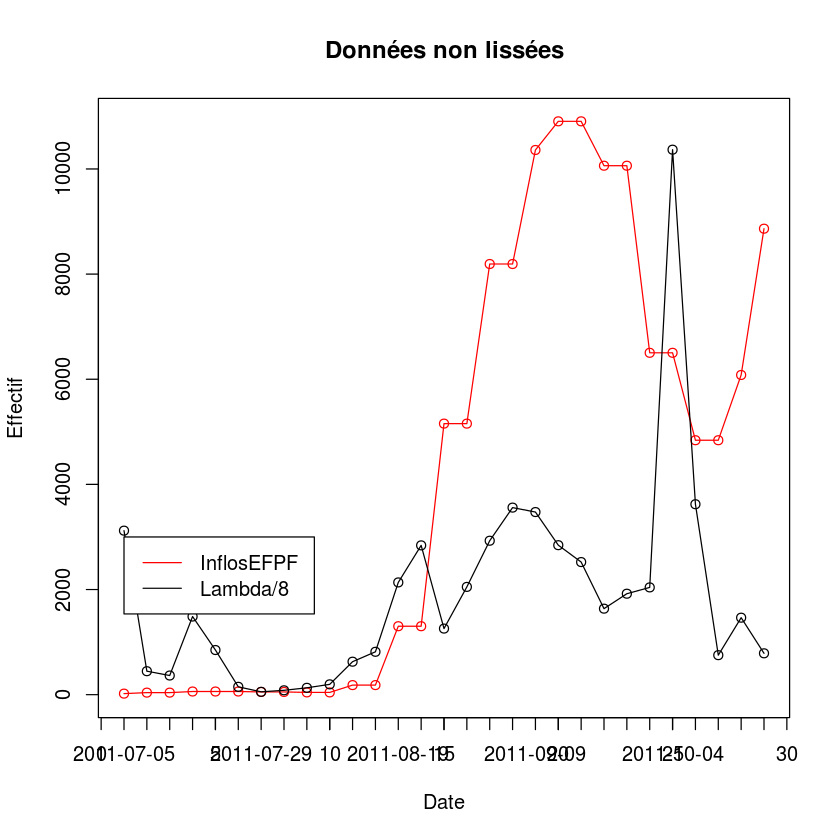

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.8234174 
[1] "p-value : "
[1] 4.125888e-08


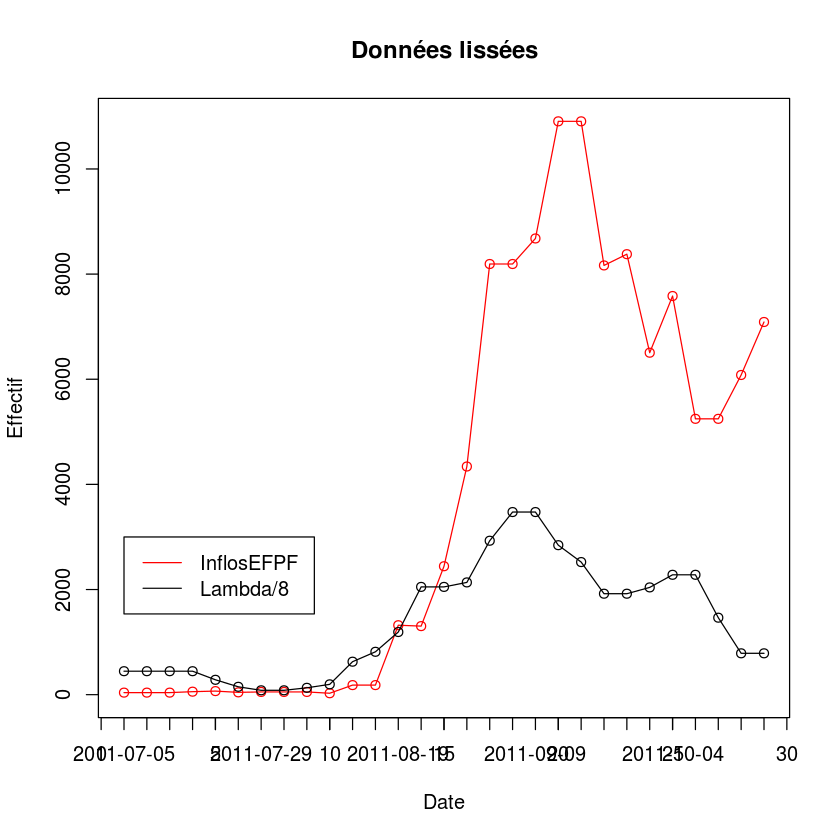

In [20]:
# Stades E+F+PF

InflosEFPF = NbInflosPar2 + NbInflosPar3 + NbInflosPar4
plot(InflosEFPF,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosEFPF)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 3000, legend=c("InflosEFPF","Lambda/8"),col=c("red","black"), lty=1)
c_EFPF = cor.test(InflosEFPF,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_EFPF$estimate)
print ("p-value : ")
print (c_EFPF$p.value)


InflosEFPF_sm = NbInflosPar2_sm + NbInflosPar3_sm + NbInflosPar4_sm
plot(InflosEFPF_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosEFPF_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosEFPF","Lambda/8"),col=c("red","black"), lty=1)
c_EFPF_sm = cor.test(InflosEFPF_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_EFPF_sm$estimate)
print ("p-value : ")
print (c_EFPF_sm$p.value)

[1] "Données non lissées"
[1] "Taux de correlation : "
      cor 
0.5095347 
[1] "p-value : "
[1] 0.004753125


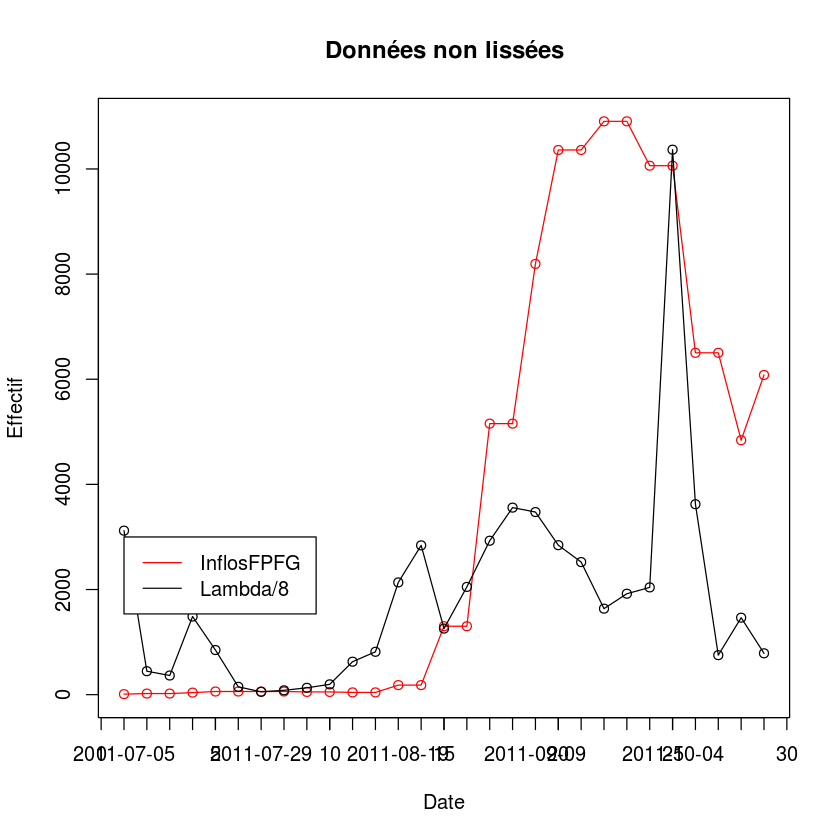

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.7169089 
[1] "p-value : "
[1] 1.212391e-05


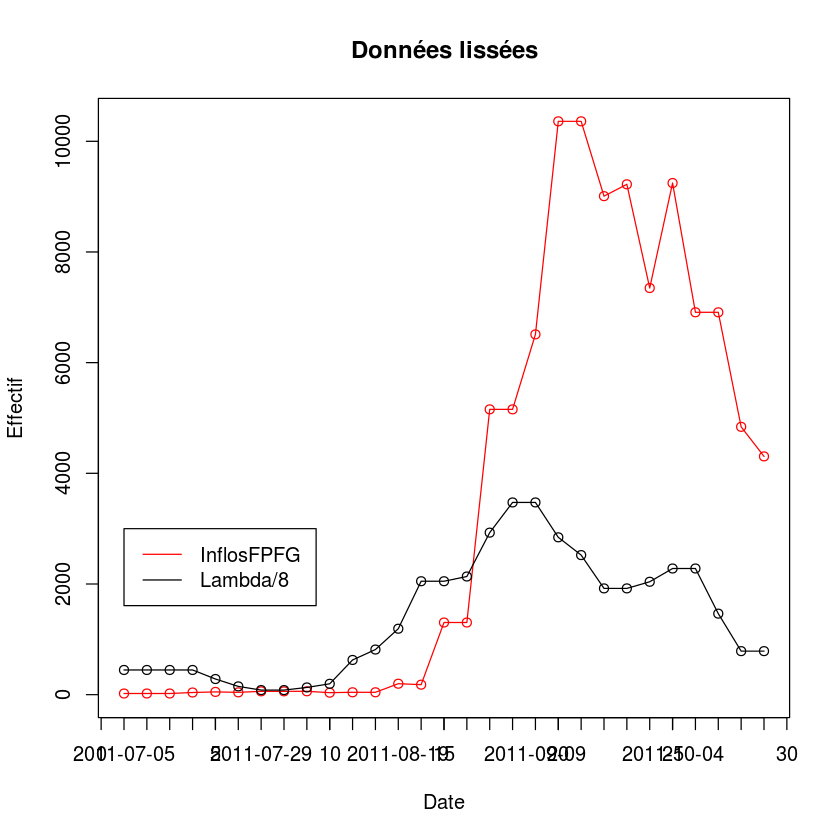

In [21]:
# Stades F+PF+G

InflosFPFG = NbInflosPar3 + NbInflosPar4 + NbInflosPar5
plot(InflosFPFG,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosFPFG)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 3000, legend=c("InflosFPFG","Lambda/8"),col=c("red","black"), lty=1)
c_FPFG = cor.test(InflosFPFG,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_FPFG$estimate)
print ("p-value : ")
print (c_FPFG$p.value)


InflosFPFG_sm = NbInflosPar3_sm + NbInflosPar4_sm + NbInflosPar5_sm
plot(InflosFPFG_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosFPFG_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosFPFG","Lambda/8"),col=c("red","black"), lty=1)
c_FPFG_sm = cor.test(InflosFPFG_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_FPFG_sm$estimate)
print ("p-value : ")
print (c_FPFG_sm$p.value)

## Groupement de stades successifs 4 à 4.

[1] "Données non lissées"
[1] "Taux de correlation : "
    cor 
0.45334 
[1] "p-value : "
[1] 0.01351836


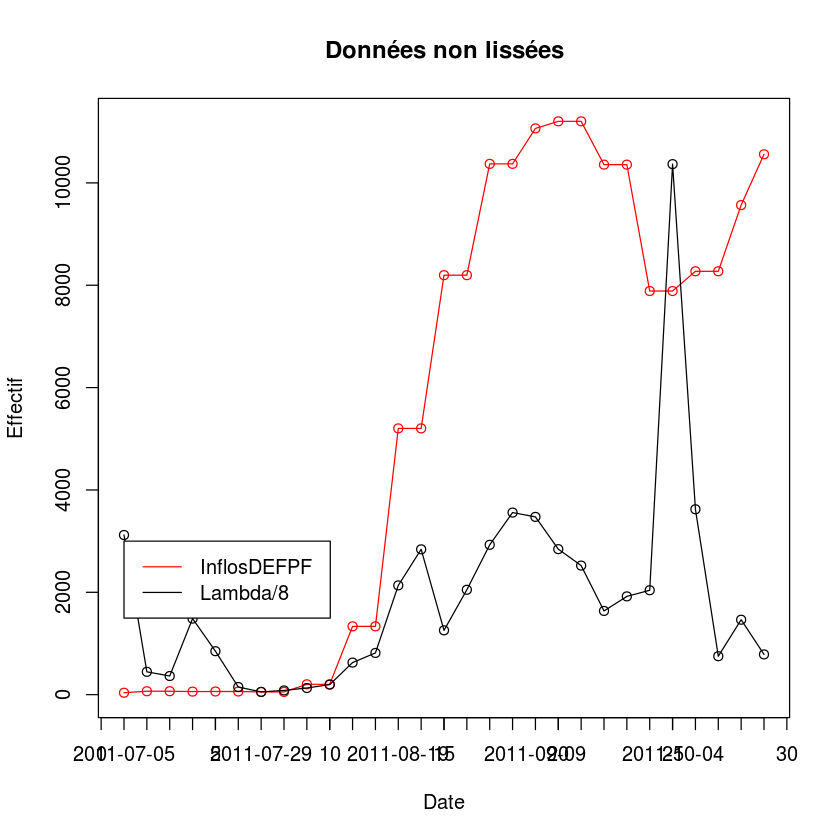

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.8311722 
[1] "p-value : "
[1] 2.362686e-08


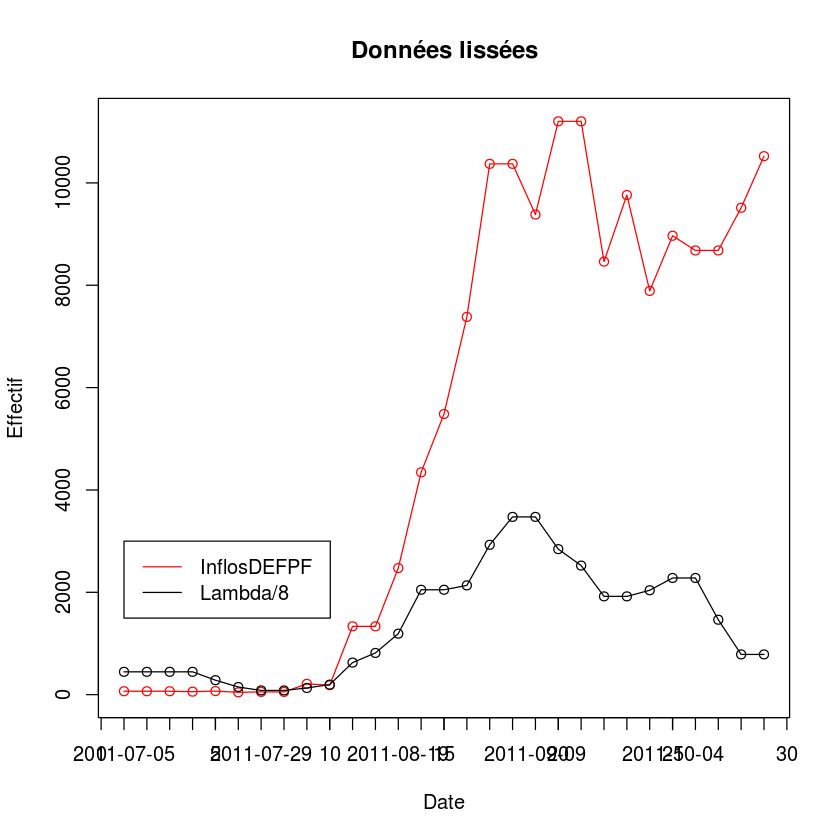

In [22]:
# Stades D+E+F+PF

InflosDEFPF = NbInflosPar1 + NbInflosPar2 + NbInflosPar3 + NbInflosPar4
plot(InflosDEFPF,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosDEFPF)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 3000, legend=c("InflosDEFPF","Lambda/8"),col=c("red","black"), lty=1)
c_DEFPF = cor.test(InflosDEFPF,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_DEFPF$estimate)
print ("p-value : ")
print (c_DEFPF$p.value)


InflosDEFPF_sm = NbInflosPar1_sm + NbInflosPar2_sm + NbInflosPar3_sm + NbInflosPar4_sm
plot(InflosDEFPF_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosDEFPF_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosDEFPF","Lambda/8"),col=c("red","black"), lty=1)
c_DEFPF_sm = cor.test(InflosDEFPF_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_DEFPF_sm$estimate)
print ("p-value : ")
print (c_DEFPF_sm$p.value)

[1] "Données non lissées"
[1] "Taux de correlation : "
      cor 
0.5032153 
[1] "p-value : "
[1] 0.005392961


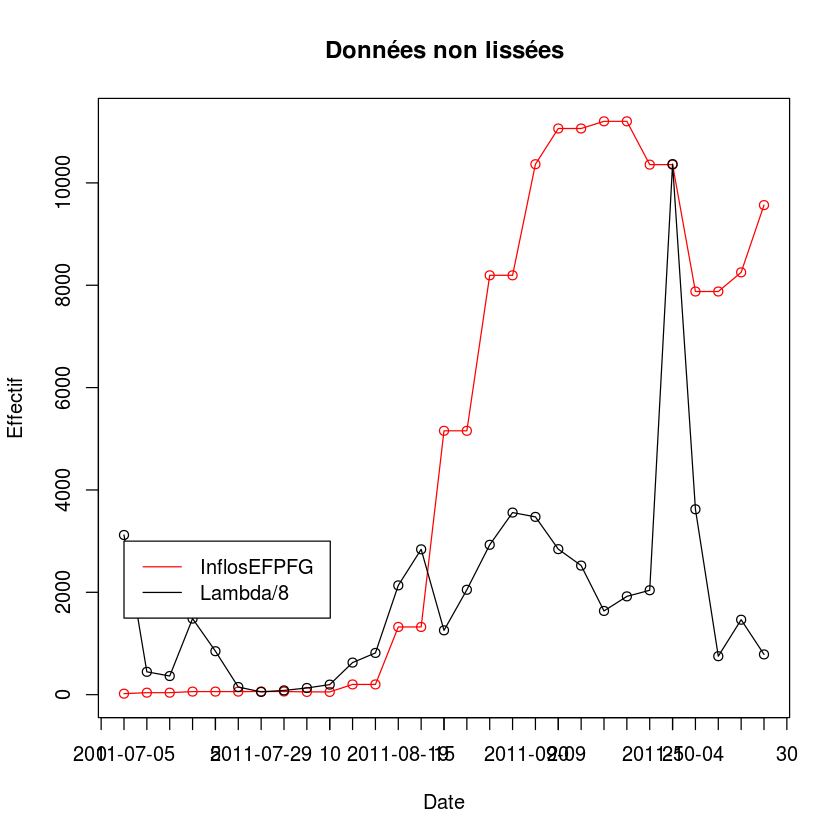

[1] "Données lissées"
[1] "Taux de correlation : "
      cor 
0.7793012 
[1] "p-value : "
[1] 6.323704e-07


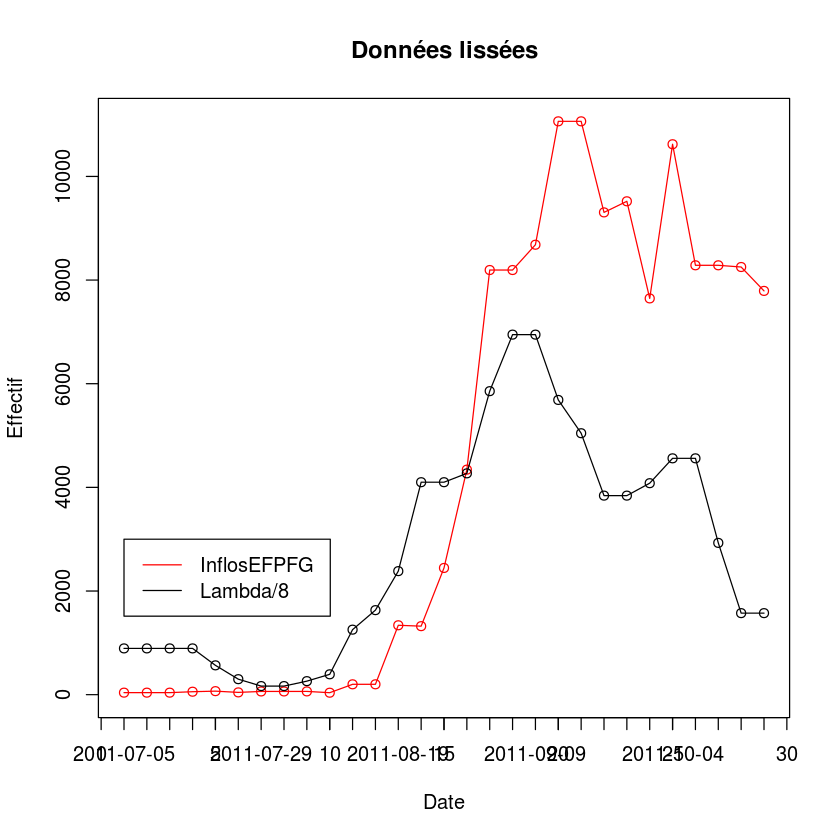

In [23]:
# Stades E+F+PF+G

InflosEFPFG = NbInflosPar2 + NbInflosPar3 + NbInflosPar4 + NbInflosPar5
plot(InflosEFPFG,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0/8,InflosEFPFG)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0/8,type='o')
title("Données non lissées")
legend(1, 3000, legend=c("InflosEFPFG","Lambda/8"),col=c("red","black"), lty=1)
c_EFPFG = cor.test(InflosEFPFG,lambda0/8)
print ("Données non lissées")
print ("Taux de correlation : ")
print (c_EFPFG$estimate)
print ("p-value : ")
print (c_EFPFG$p.value)


InflosEFPFG_sm = NbInflosPar2_sm + NbInflosPar3_sm + NbInflosPar4_sm + NbInflosPar5_sm
plot(InflosEFPFG_sm,type='o',xlab="Date",ylab="Effectif",col='red',ylim=c(0,max(lambda0_sm/8,InflosEFPFG_sm)))
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/4,type='o')
title("Données lissées")
legend(1, 3000, legend=c("InflosEFPFG","Lambda/8"),col=c("red","black"), lty=1)
c_EFPFG_sm = cor.test(InflosEFPFG_sm,lambda0_sm/8)
print ("Données lissées")
print ("Taux de correlation : ")
print (c_EFPFG_sm$estimate)
print ("p-value : ")
print (c_EFPFG_sm$p.value)

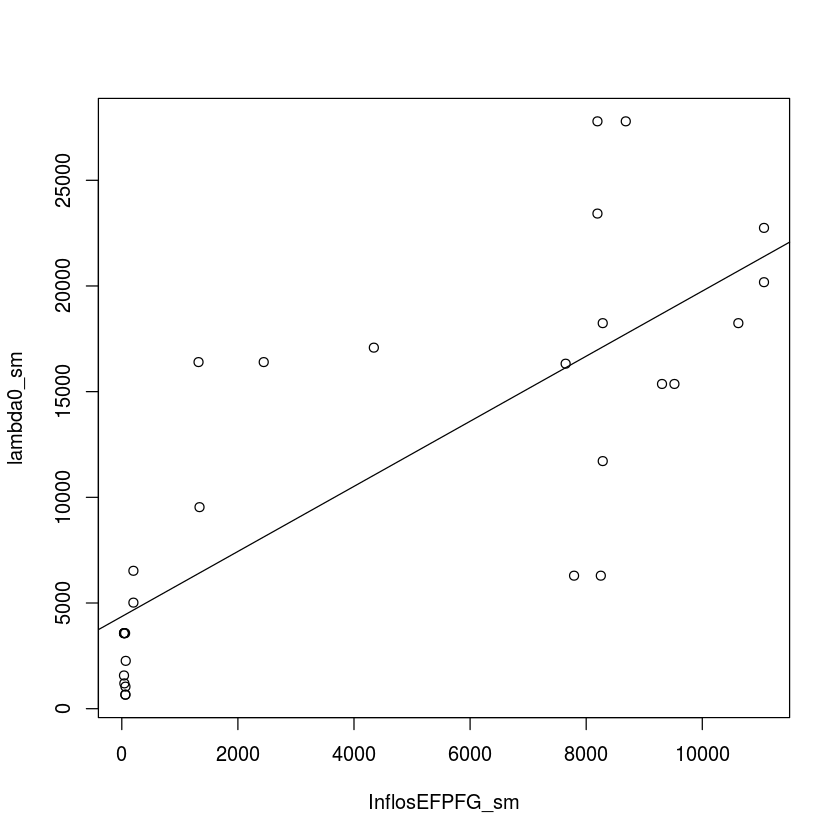

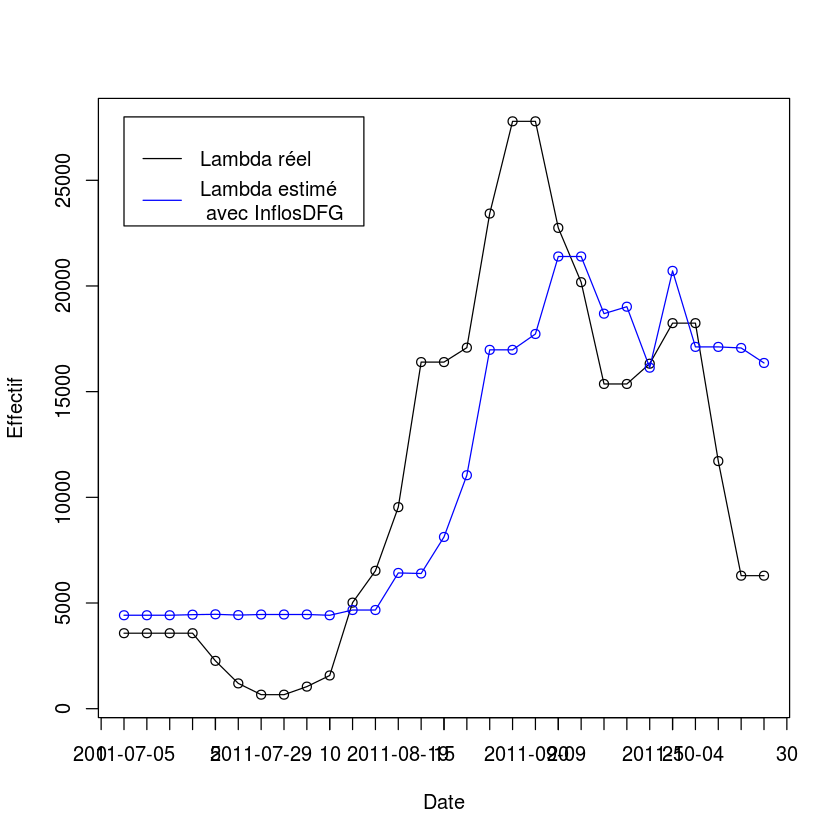

In [24]:
# Relation linéaire

plot(InflosEFPFG_sm,lambda0_sm)
fit = lm(lambda0_sm~InflosEFPFG_sm)
abline(a=fit$coef[1], b=fit$coef[2])

plot(lambda0_sm,type='o',xlab='Date',ylab='Effectif')
points(InflosEFPFG_sm*fit$coef[2]+fit$coef[1],type='o',col='blue')
axis(1,at=1:29, lab=as.character(date))
legend(1, 28000, legend=c("Lambda réel","Lambda estimé \n avec InflosDFG"),col=c("black","blue"), lty=1)

## Inflorescences aux stades D, F & G

Grâce aux graphes précédents, on peut voir quelles inflorescences (à quel stade) sont déterminantes dans le nombre de cécidomyies. Nous prenons une population d'inflorescences composées de la population des inflorescences au stade D du 5 juillet au 30 août, au stade F du 2 septembre au 27 septembre et au stade G du 30 septembre au 21 octobre.


	Pearson's product-moment correlation

data:  lambda0 and InflosDFG
t = 3.5547, df = 27, p-value = 0.001419
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2498067 0.7714777
sample estimates:
      cor 
0.5646184 



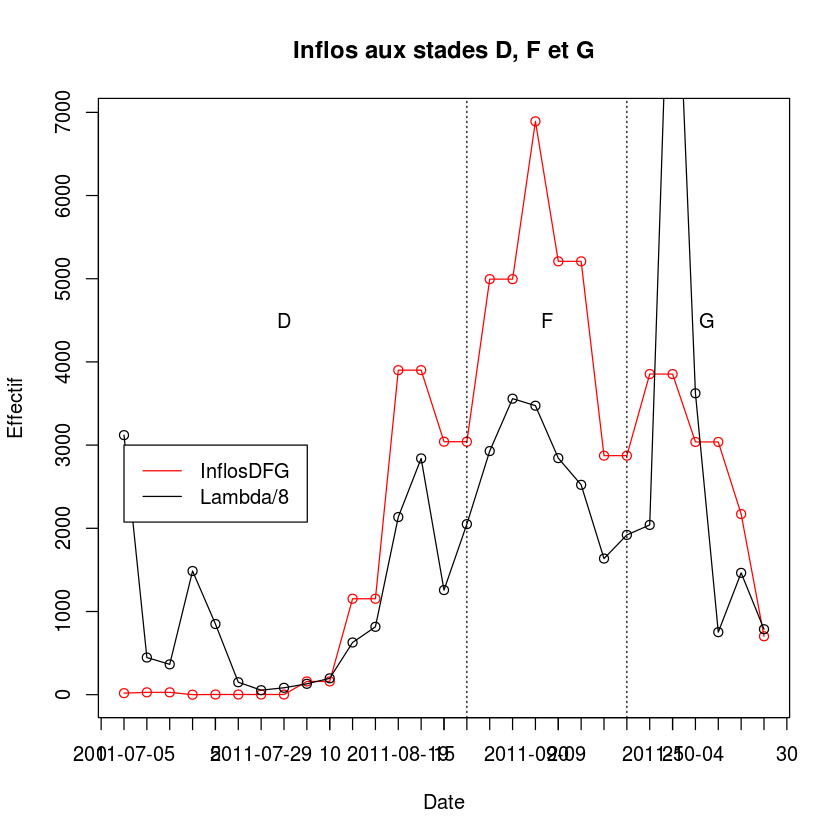

In [25]:
InflosDFG = c(NbInflosPar1[1:16], NbInflosPar3[17:23], NbInflosPar5[24:29])
plot(InflosDFG,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
abline(v=16,lty=3)
abline(v=23,lty=3)
points(lambda0/8,type='o')
title("Inflos aux stades D, F et G")
text(8,4500,"D")
text(19.5,4500,"F")
text(26.5,4500,"G")
legend(1, 3000, legend=c("InflosDFG","Lambda/8"),col=c("red","black"), lty=1)

#Coefficient de correlation
cc_DFG = cor.test(lambda0,InflosDFG)
print (cc_DFG) 


	Pearson's product-moment correlation

data:  lambda0_sm and InflosDFG_sm1
t = 14.138, df = 27, p-value = 5.341e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8721312 0.9710671
sample estimates:
      cor 
0.9386165 



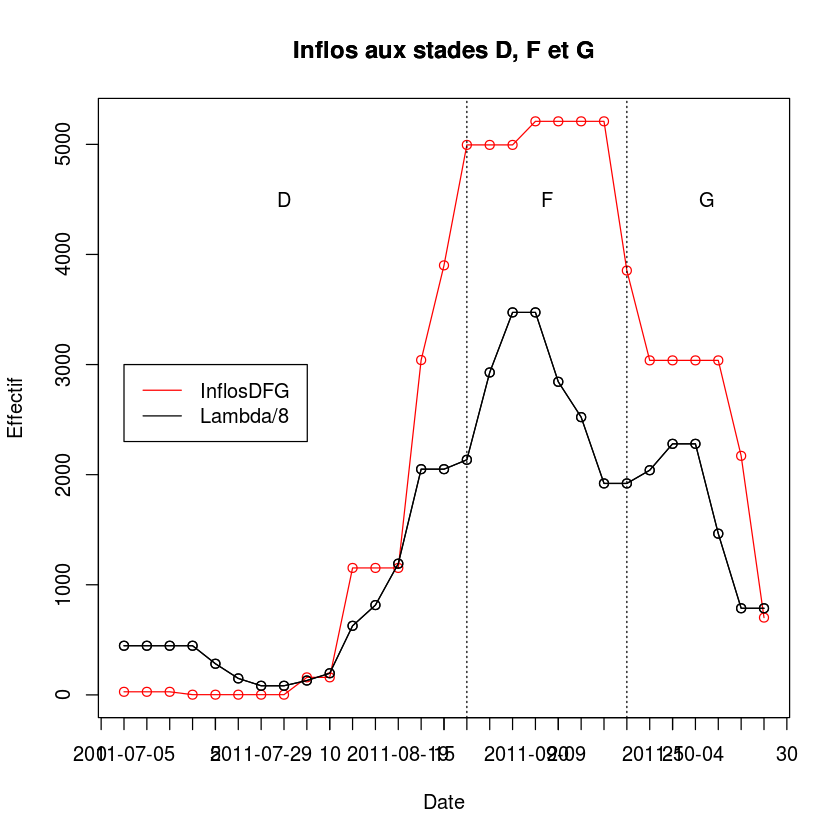

In [26]:
# Lissage 1 
InflosDFG_sm1 = smooth(InflosDFG)

plot(InflosDFG_sm1,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
abline(v=16,lty=3)
abline(v=23,lty=3)
points(lambda0_sm/8,type='o')
title("Inflos aux stades D, F et G")
title("Inflos aux stades D, F et G")
text(8,4500,"D")
text(19.5,4500,"F")
text(26.5,4500,"G")
legend(1, 3000, legend=c("InflosDFG","Lambda/8"),col=c("red","black"), lty=1)

#Coefficient de correlation
cc_DFG_sm1 = cor.test(lambda0_sm,InflosDFG_sm1)
print (cc_DFG_sm1) 


	Pearson's product-moment correlation

data:  lambda0_sm and InflosDFG_sm2
t = 15.034, df = 27, p-value = 1.218e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8853046 0.9741884
sample estimates:
      cor 
0.9451411 



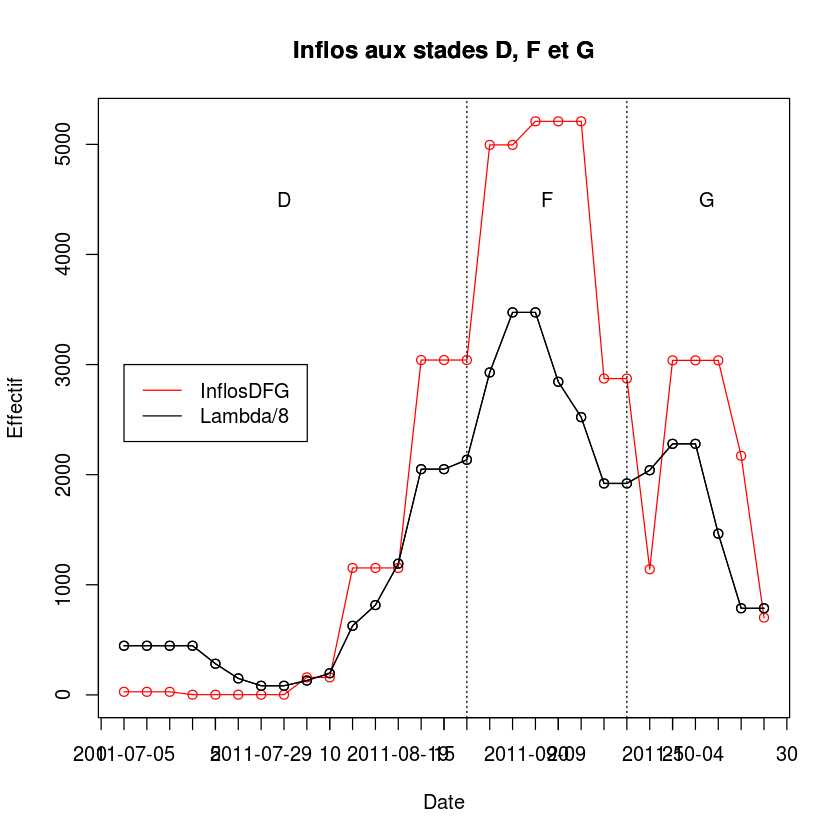

In [27]:
# Lissage 2
InflosDFG_sm2 = c(NbInflosPar1_sm[1:16], NbInflosPar3_sm[17:23], NbInflosPar5_sm[24:29])

plot(InflosDFG_sm2,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
abline(v=16,lty=3)
abline(v=23,lty=3)
points(lambda0_sm/8,type='o')
title("Inflos aux stades D, F et G")
title("Inflos aux stades D, F et G")
text(8,4500,"D")
text(19.5,4500,"F")
text(26.5,4500,"G")
legend(1, 3000, legend=c("InflosDFG","Lambda/8"),col=c("red","black"), lty=1)

#Coefficient de correlation
cc_DFG_sm2 = cor.test(lambda0_sm,InflosDFG_sm2)
print (cc_DFG_sm2) 


	Pearson's product-moment correlation

data:  lambda0_sm and InflosDFG_sm3
t = 19.09, df = 27, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9257844 0.9835715
sample estimates:
      cor 
0.9648959 



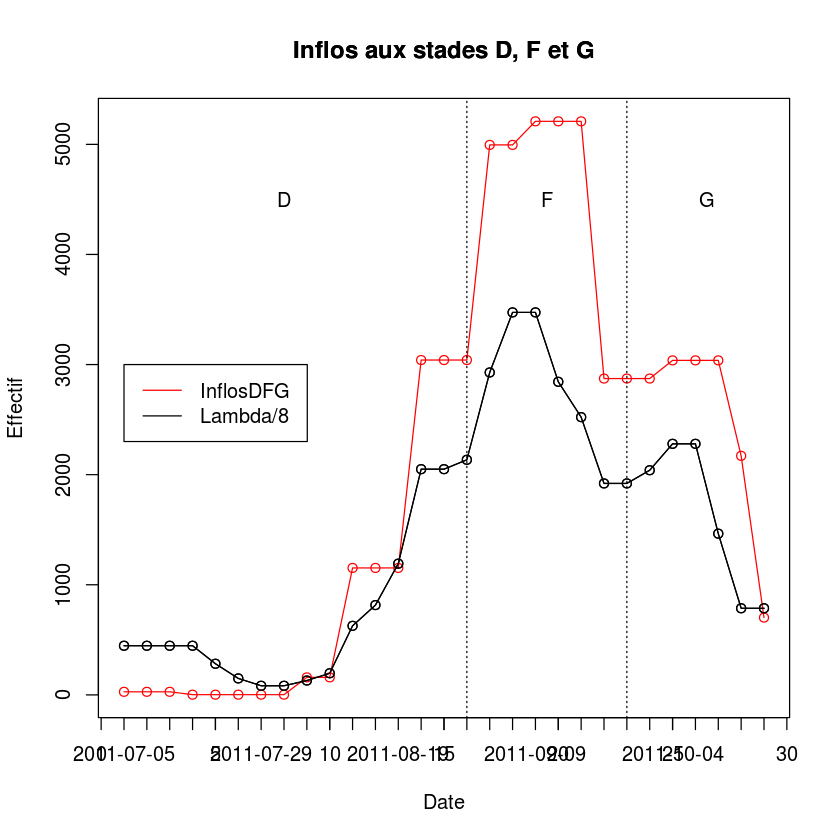

In [28]:
# Lissage 3
InflosDFG_sm3 = smooth(InflosDFG_sm2)

plot(InflosDFG_sm3,type='o',xlab="Date",ylab="Effectif",col='red')
axis(1,at=1:29, lab=as.character(date))
points(lambda0_sm/8,type='o')
abline(v=16,lty=3)
abline(v=23,lty=3)
points(lambda0_sm/8,type='o')
title("Inflos aux stades D, F et G")
title("Inflos aux stades D, F et G")
text(8,4500,"D")
text(19.5,4500,"F")
text(26.5,4500,"G")
legend(1, 3000, legend=c("InflosDFG","Lambda/8"),col=c("red","black"), lty=1)

#Coefficient de correlation
cc_DFG_sm3 = cor.test(lambda0_sm,InflosDFG_sm3)
print (cc_DFG_sm3) 

Le coefficient de corrélation est de 0.96, très élevé et la p-value très faible. 

De plus, visuellement aussi, la nouvelles courbe d'inflorescence et les cécidomyies entrant dans le verger ont la même allure. 

## CONCLUSION  sur ces combinaisons 

* DE : Mieux en lissé, taux de corrélation égal à 0.5. Le pic des inflo intervient un peu avant le pic des cécidomyies. Mais les inflos ré augmentent à la fin. 

* EF : Mieux en lissé, taux de corrélation égal à 0.8. Le pic des inflo intervient en même temps que le pic des cécidomyies. Mais les inflos ré augmentent à la fin. 

* FPF : Mieux en lissé, taux de corrélation égal à 0.76. Le pic des inflo intervient un peu après le pic des cécidomyies. Les inflos diminuent à la fin. 

* PFG : Mieux en non lissé, taux de corrélation égal à 0.5. Le pic des inflo intervient en même temps que le pic des cécidomyies (le pic en non lissé, soit le pic un peu bizarre).

* DEF : Mieux en lissé, taux de corrélation égal à 0.77. Le pic des inflo intervient en même temps que le pic des cécidomyies. Mais les inflos ré augmentent à la fin. 

* EFPF : Mieux en lissé, taux de corrélation égal à 0.82. Le pic des inflo intervient en même temps le pic des cécidomyies. Les inflos inflos diminuent et ré augmentent à la fin. 

* FPFG : Mieux en lissé, taux de corrélation égal à 0.72. Le pic des inflo intervient un peu après le pic des cécidomyies. Les inflos diminuent à la fin. 

* DEFPF : Mieux en non lissé, taux de corrélation égal à 0.8. Le pic des inflo intervient en même temps le pic des cécidomyies. Les inflos inflos diminuent et ré augmentent à la fin. 

* EFPFG : Mieux en non lissé, taux de corrélation égal à 0.78. Le pic des inflo intervient en même temps le pic des cécidomyies. Les inflos inflos diminuent à la fin. 

On peut déjà éliminer DE et PFG à cause du taux de corrélation faible.
EFPFG? D'un point de vue biologique interessant car on élimine le premier stade 

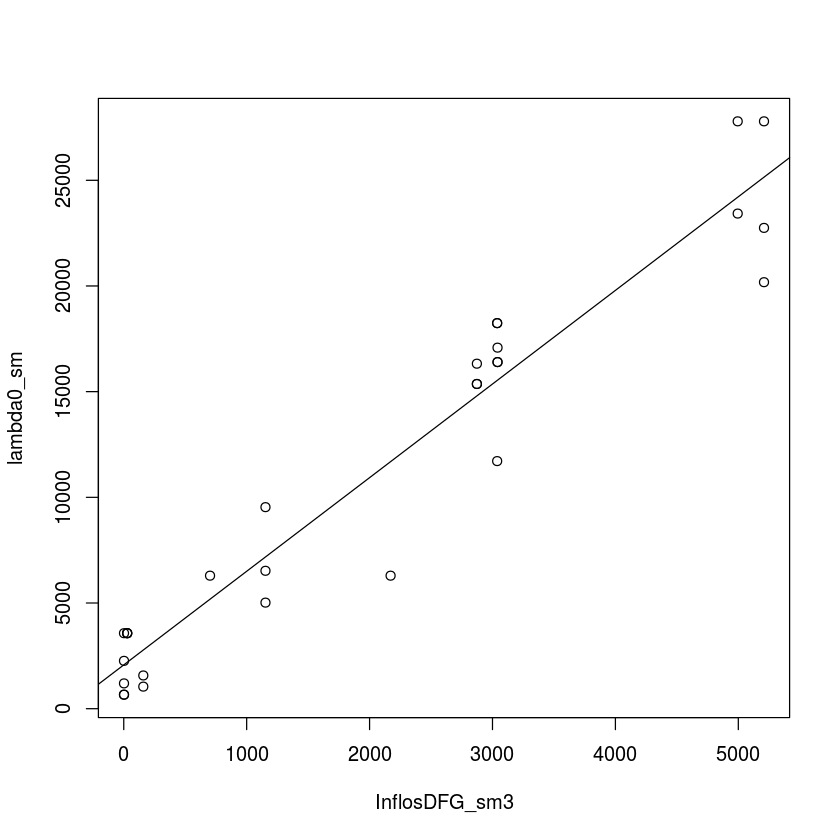

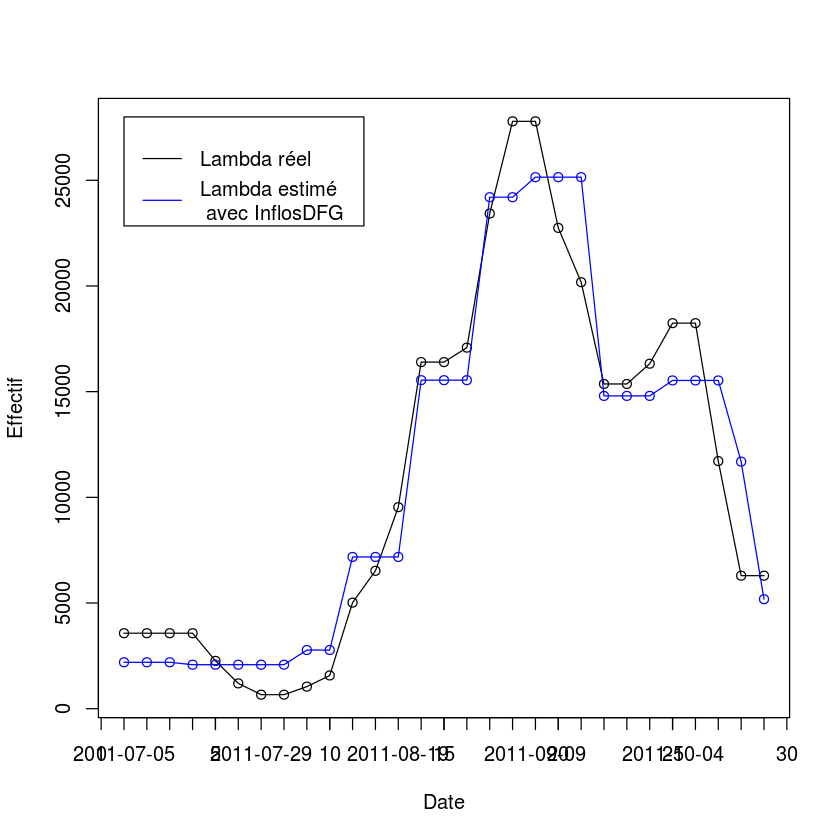

In [29]:
# Relation linéaire

plot(InflosDFG_sm3,lambda0_sm)
fit = lm(lambda0_sm~InflosDFG_sm3)
abline(a=fit$coef[1], b=fit$coef[2])

plot(lambda0_sm,type='o',xlab='Date',ylab='Effectif')
points(InflosDFG_sm3*fit$coef[2]+fit$coef[1],type='o',col='blue')
axis(1,at=1:29, lab=as.character(date))
legend(1, 28000, legend=c("Lambda réel","Lambda estimé \n avec InflosDFG"),col=c("black","blue"), lty=1)

## Conclusion

Nous avons une population d'inflorescences composées de la population des inflorescences au stade D du 5 juillet au 30 août, au stade F du 2 septembre au 27 septembre et au stade G du 30 septembre au 21 octobre. Nous notons cette population $I_{DFG}$. Grâce à ce qui précède, nous avons établi une relation entre les inflorescences et les cécidomyies entrant dans le verger $\lambda_t$ :

$$\lambda[t] = I_{DFG}[t]*4.43 + 2071.12$$

Maintenant, nous allons voir si nous retrouvons le même genre de dynamique de population pour les inflorescences avec les données relevées par Alain et Christian dans le fichier "InflosDFG (A&C)" situé dans le fichier courant.